In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = (32, 18)

In [2]:
#dataset from https://www.kaggle.com/pronto/cycle-share-dataset
trip = pd.read_csv("cycle-share-dataset/trip.csv", skiprows=50794, 
                   names = ["trip_id", "starttime", "stoptime", "bikeid","tripduration","from_station_name","to_station_name","from_station_id","to_station_id","usertype","gender","birthyear"])

Context

The Pronto Cycle Share system consists of 500 bikes and 54 stations located in Seattle. Pronto provides open data on individual trips, stations, and daily weather.


### Trip dataset

trip_id: numeric ID of bike trip taken

starttime: day and time trip started, in PST

stoptime: day and time trip ended, in PST

bikeid: ID attached to each bike

tripduration: time of trip in seconds

from_station_name: name of station where trip originated

to_station_name: name of station where trip terminated

from_station_id: ID of station where trip originated

to_station_id: ID of station where trip terminated

usertype: "Short-Term Pass Holder" is a rider who purchased a 24-Hour or 3-Day Pass; "Member" is a rider who purchased a Monthly or an Annual Membership

gender: gender of rider

birthyear: birth year of rider

##### * Data cleaning
    * Are there missing values? 
        * Yes
    * Are there inappropraite values?
        * Yes. tripduration, 
    * Remove or impute any bad data.
        * Yes, from read_cvs at the beginning. 50000+ rows were repeated.

* Answer the following questions for the data in each column:
    * How is the data distributed?
    * What are the summary statistics?
    * Are there anomalies/outliers?
    
    * Answer:
        * trip_id: auto increasment number from 431
            * 
        * starttime: datetime from 2014 to 2016
        * stoptime: datetime from 2014 to 2016
        * bikeid: totally include 493 bikes
            * mean:478.833671, q1:464 q2:517 q3:554, range:665
            * std: 126.819396
            * likely kurtosis
            * outliers: yes
        * tripduration: 
            * mean:1202.61221, q1:392.26500, q2:633.23500, q3:1145.01500, range:28734
            * std: 2066.42488
            * skewness
            * outliers: yes
        * from_station_name/from_station_id: includes 61 unique stations
            * mean:3869, q1:2012, q2:3461, q3:5385, range: 11273
            * std: 2578.830525
            * skewness
            * outliers: yes
        * to_station_name/to_station_id: includes 61 unique stations
            * mean:3869.918033, q1:1497, q2:3201, q3:5772, range: 11766
            * std: 2909.667044
            * skewness
            * outliers: no
        * usertype:  2 classes
            * Member                :146171
            * Short-Term Pass Holder     :89894
        * gender:   3 classes, missing 89894 rows.
            * Male:112940
            * Female:30330
            * Other:2901
        * birthyear: from 1931 to 1999, missing 89898 rows.
            * mean: 1979.879740 (average 37.2 year-old)
            * q1:1975, q2:1983, q3:1987, range 68
            * skewness
            * outliers: yes
            
        

* Plot each colmun as appropriate for the data type:
    * Write a summary of what the plot tells you.
    * Although tripduration column have many outliers, but when comes to a from_station_name by tripduration plot, every station(trip start staion) have very long(outlier) trip, up to 8 hours. And every station(as trip start station) have more than one trip data over 25000 seconds.
    * Most people ride public bicycle in seatle born in 1980
    * Most people in this data set are male.
    * If that usertype * tripduration plot is correct, most member users use public bick service as regular transportation way. Short-pass users maybe use public bike to travel around the city.
* Are any of the columns correlated?
    * tripduration and gender
    * tripduration and birthyear
    * bike use per day and (if is week day)
    * other extentions
        * bike use per day and weather
        * tripduration and from_station/to_station

In [3]:
trip.apply(lambda x: sum(x.isnull()),axis=0) 

trip_id                  0
starttime                0
stoptime                 0
bikeid                   0
tripduration             0
from_station_name        0
to_station_name          0
from_station_id          0
to_station_id            0
usertype                 0
gender               89894
birthyear            89898
dtype: int64

In [4]:
trip.apply(lambda x: sum(x == 0),axis=0) 

trip_id              0
starttime            0
stoptime             0
bikeid               0
tripduration         0
from_station_name    0
to_station_name      0
from_station_id      0
to_station_id        0
usertype             0
gender               0
birthyear            0
dtype: int64

In [5]:
trip.apply(lambda x: sum(x == " "),axis=0) 

trip_id              0
starttime            0
stoptime             0
bikeid               0
tripduration         0
from_station_name    0
to_station_name      0
from_station_id      0
to_station_id        0
usertype             0
gender               0
birthyear            0
dtype: int64

In [6]:
trip.describe()

,trip_id,tripduration,birthyear
count,236065.000000,236065.00000,146167.000000
mean,130059.869333,1202.61221,1979.879740
std,72842.289278,2066.42488,10.154978
min,431.000000,60.00800,1931.000000
25%,67746.000000,392.26500,1975.000000
50%,130526.000000,633.23500,1983.000000
75%,192900.000000,1145.01500,1987.000000
max,255245.000000,28794.39800,1999.000000


In [7]:
trip.bikeid.value_counts()

SEA00281    667
SEA00035    652
SEA00472    633
SEA00368    625
SEA00308    618
SEA00072    615
SEA00374    613
SEA00456    612
SEA00183    610
SEA00443    610
SEA00301    609
SEA00205    609
SEA00033    605
SEA00277    600
SEA00470    600
SEA00115    599
SEA00218    599
SEA00254    598
SEA00475    598
SEA00194    598
SEA00082    598
SEA00349    596
SEA00259    596
SEA00025    596
SEA00234    594
SEA00228    593
SEA00478    593
SEA00173    593
SEA00423    592
SEA00452    592
           ... 
SEA00017    201
SEA00013    197
SEA00015    186
SEA00001    180
SEA00006    175
SEA00005    170
SEA00251    162
SEA00273    162
SEA00376    148
SEA00439    132
SEA00344    127
SEA00355    116
SEA00077    112
SEA00441    102
SEA00007     97
SEA00269     97
SEA00163     84
SEA00406     70
SEA00367     48
SEA00366     45
SEA00123     33
SEA00076     29
SEA00225     27
SEA00050     23
SEA00331     18
SEA00378     13
SEA00018     12
SEA00130      9
SEA00020      4
SEA99997      2
Name: bikeid, Length: 49

In [8]:
trip.bikeid.value_counts().describe()

count    493.000000
mean     478.833671
std      126.819396
min        2.000000
25%      464.000000
50%      517.000000
75%      554.000000
max      667.000000
Name: bikeid, dtype: float64

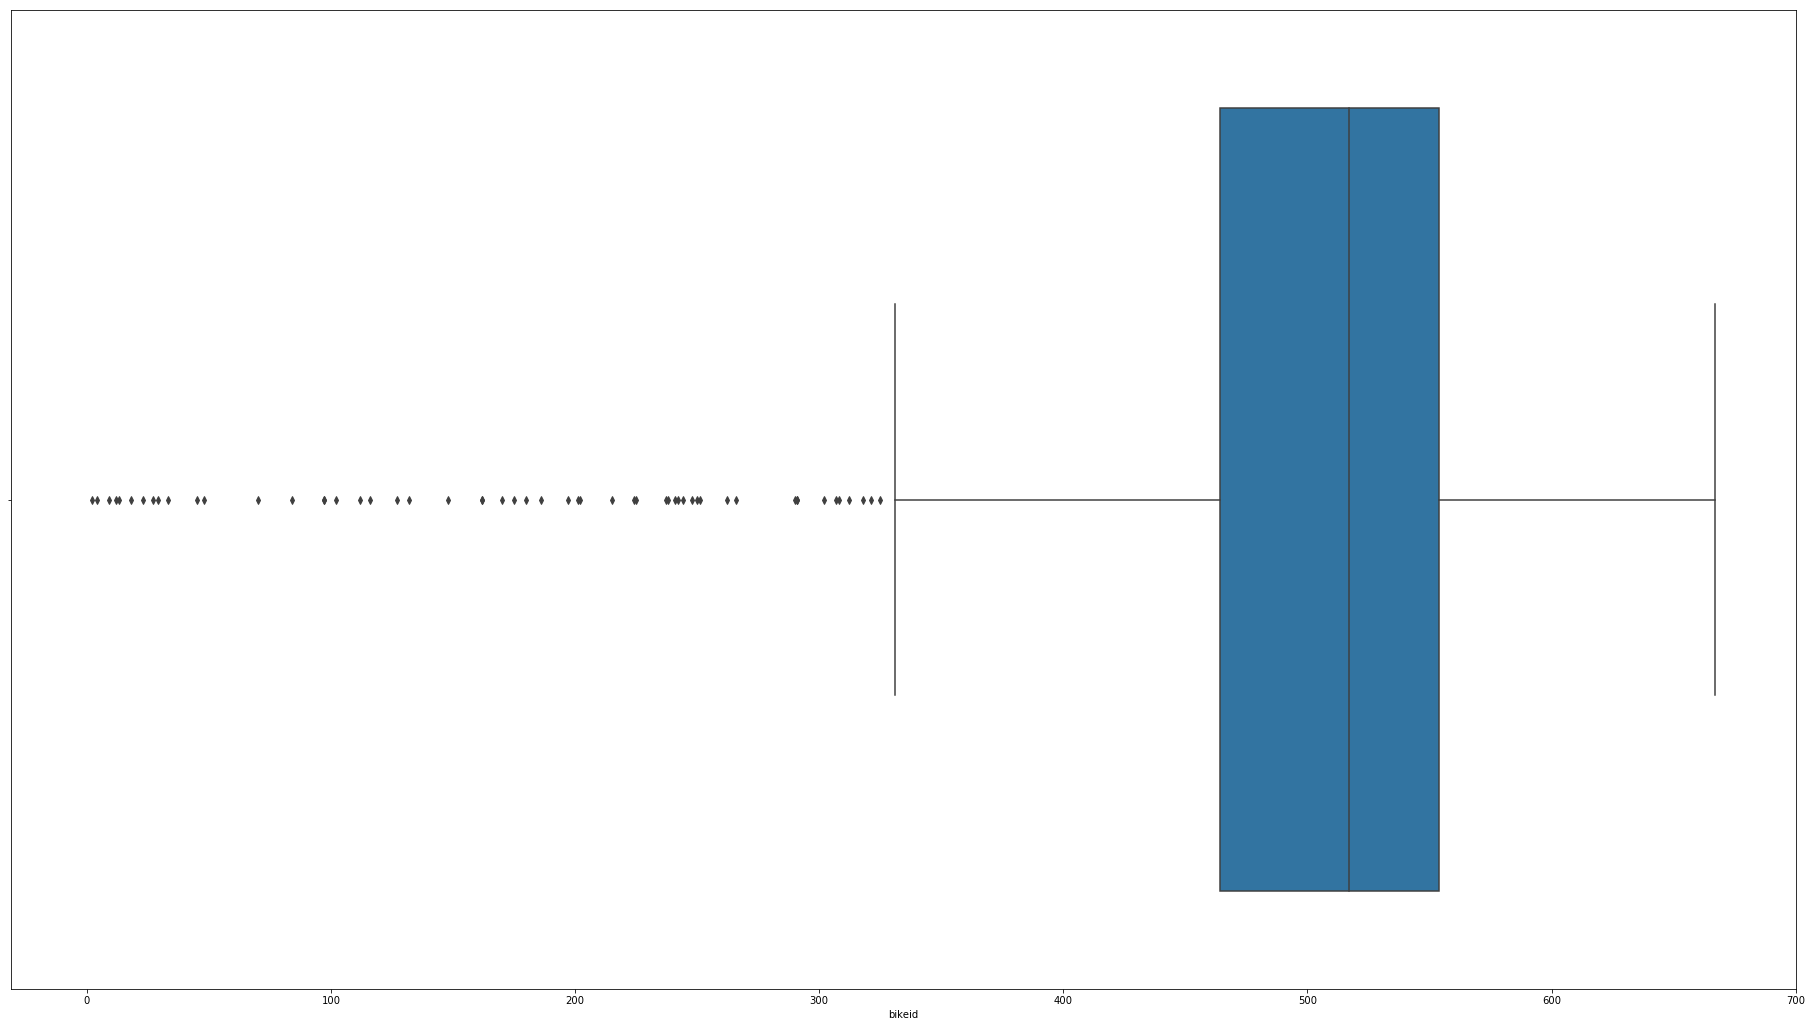

In [9]:
sns.boxplot(x=trip.bikeid.value_counts());

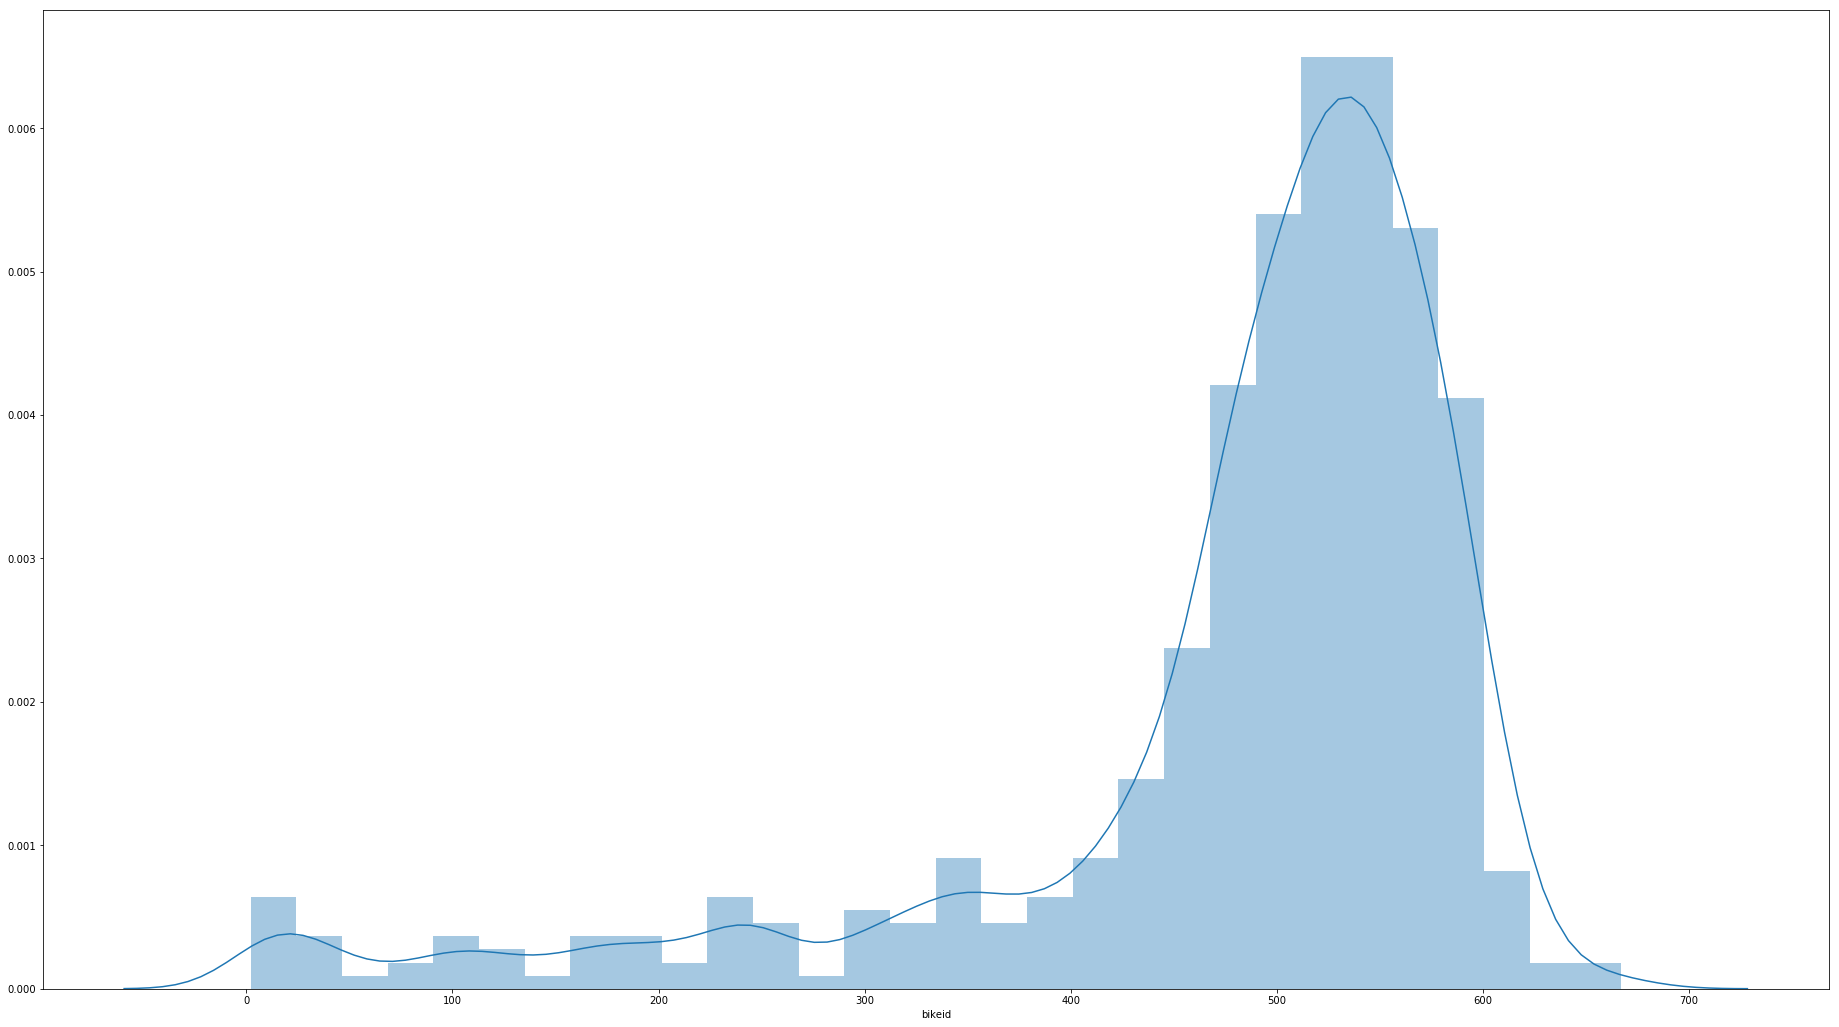

In [10]:
sns.distplot(trip.bikeid.value_counts())

In [11]:
trip.tripduration.describe()

count    236065.00000
mean       1202.61221
std        2066.42488
min          60.00800
25%         392.26500
50%         633.23500
75%        1145.01500
max       28794.39800
Name: tripduration, dtype: float64

In [12]:
trip.tripduration[trip["tripduration"] > 20000]

68        25119.114
408       27583.945
512       23346.911
894       21834.346
895       21776.479
3373      23663.767
3492      27985.884
4216      21442.501
5031      27067.720
5530      21537.940
5740      22372.978
7078      21523.101
8276      26312.451
8634      20129.414
8879      22247.478
9308      22306.544
9412      22878.546
10486     25185.582
11141     20812.140
12260     28690.725
12261     28687.625
13596     21408.143
13898     28044.040
14412     20904.867
15360     20686.571
16140     20022.790
16141     20012.593
16371     24201.759
16459     28242.601
17137     23041.260
            ...    
226377    22143.954
226378    22148.026
227466    26138.764
228243    21447.764
228244    21454.817
228249    21270.750
228250    21283.677
228252    21179.324
228299    20109.352
228300    20116.864
228444    25238.935
228445    25222.081
229158    25304.350
229236    24297.505
229237    24300.226
230968    20943.960
231153    20158.287
231402    21807.113
231403    21794.940


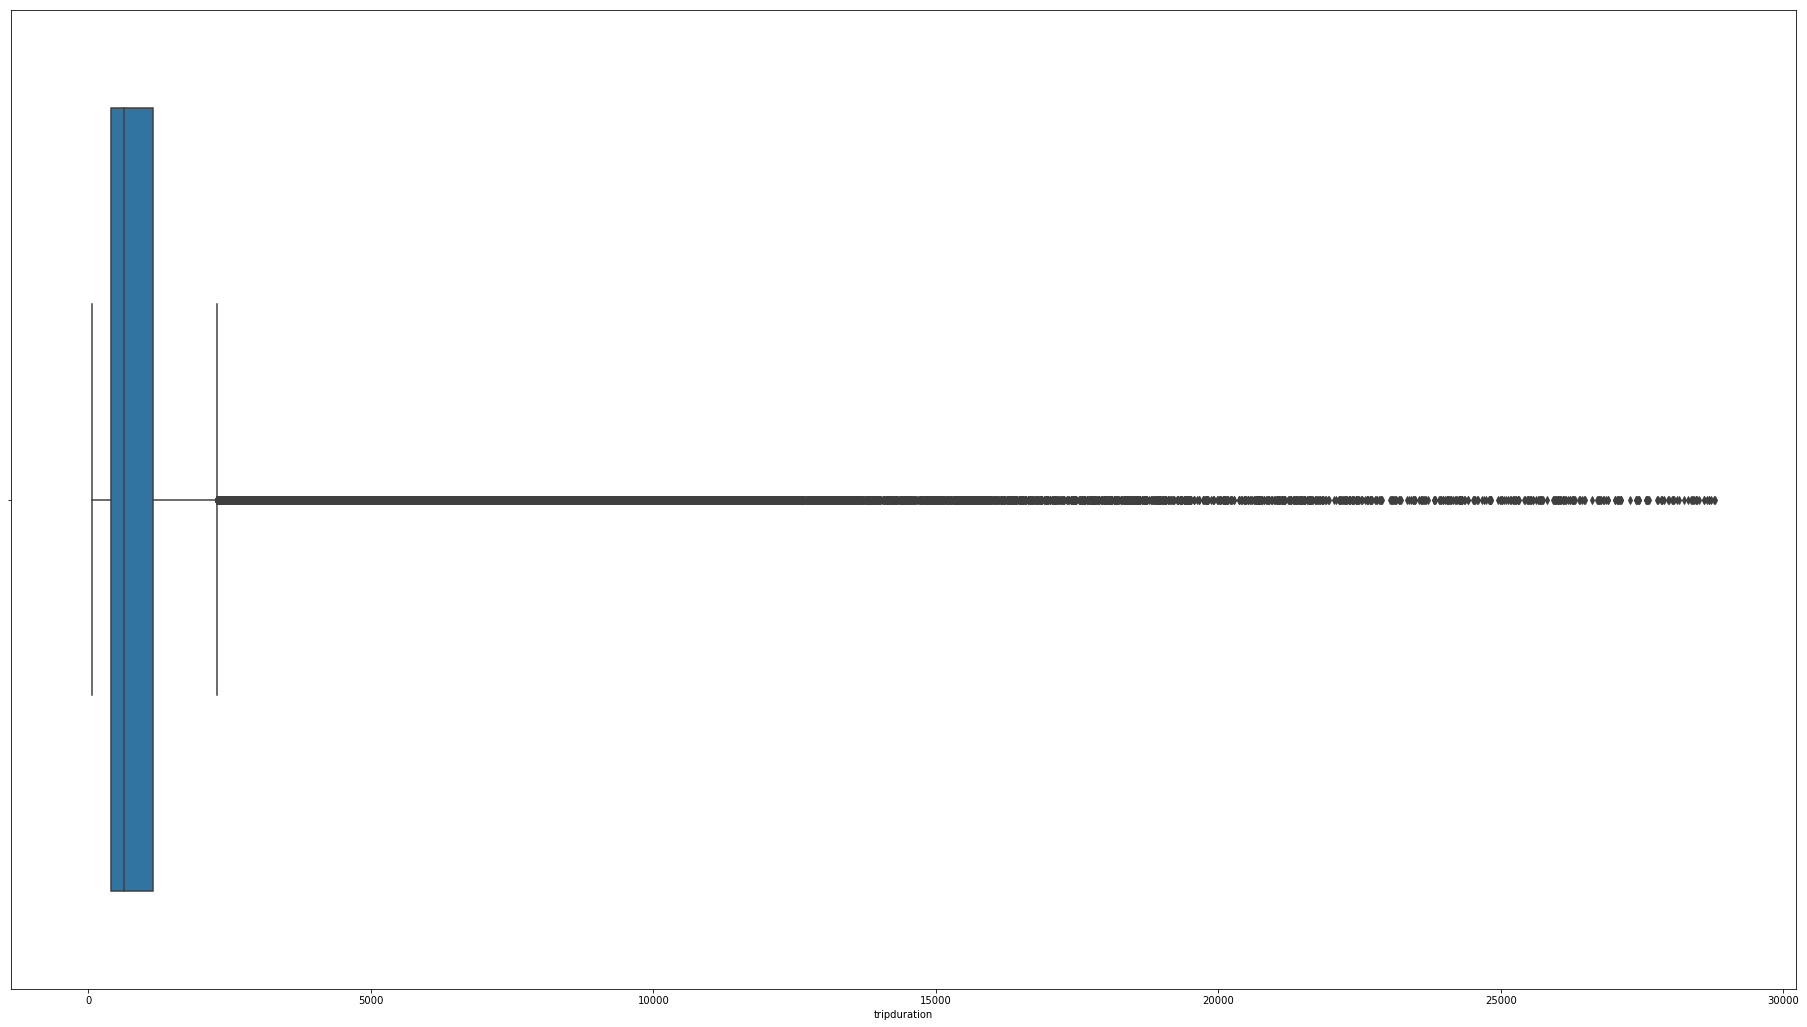

In [13]:
sns.boxplot(x="tripduration", data=trip);

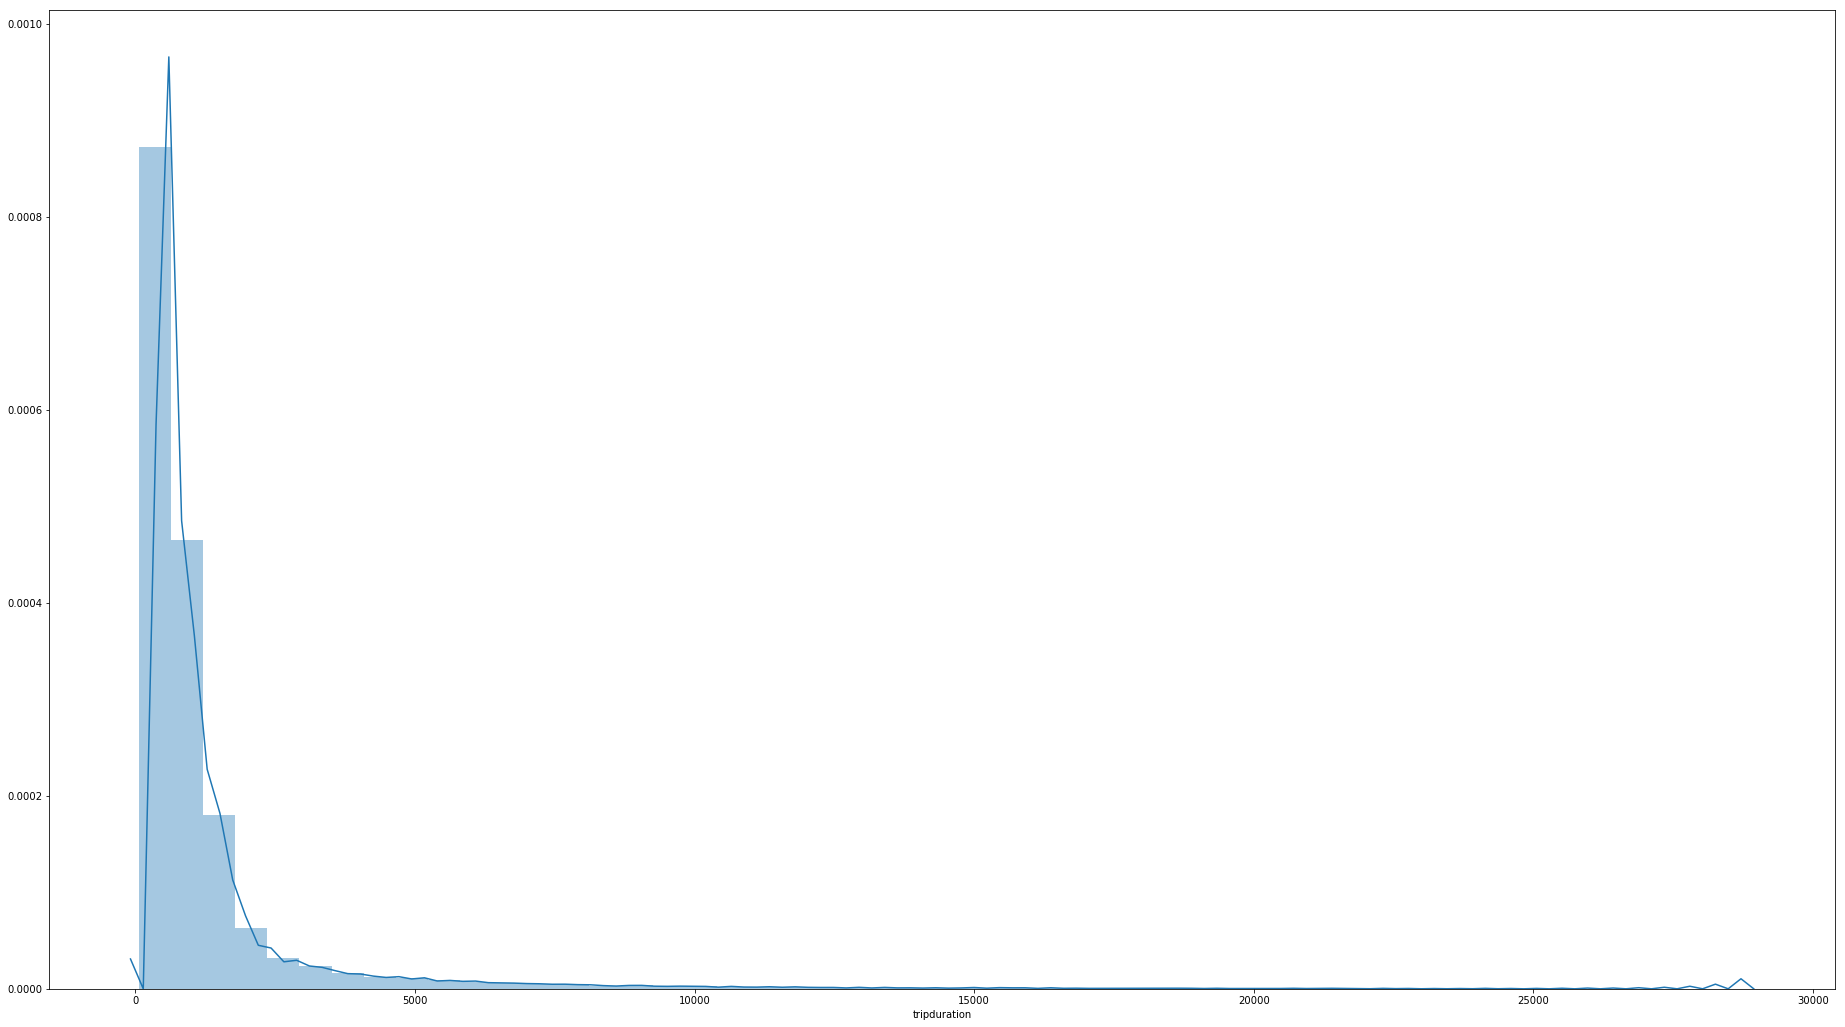

In [14]:
sns.distplot(trip['tripduration'])

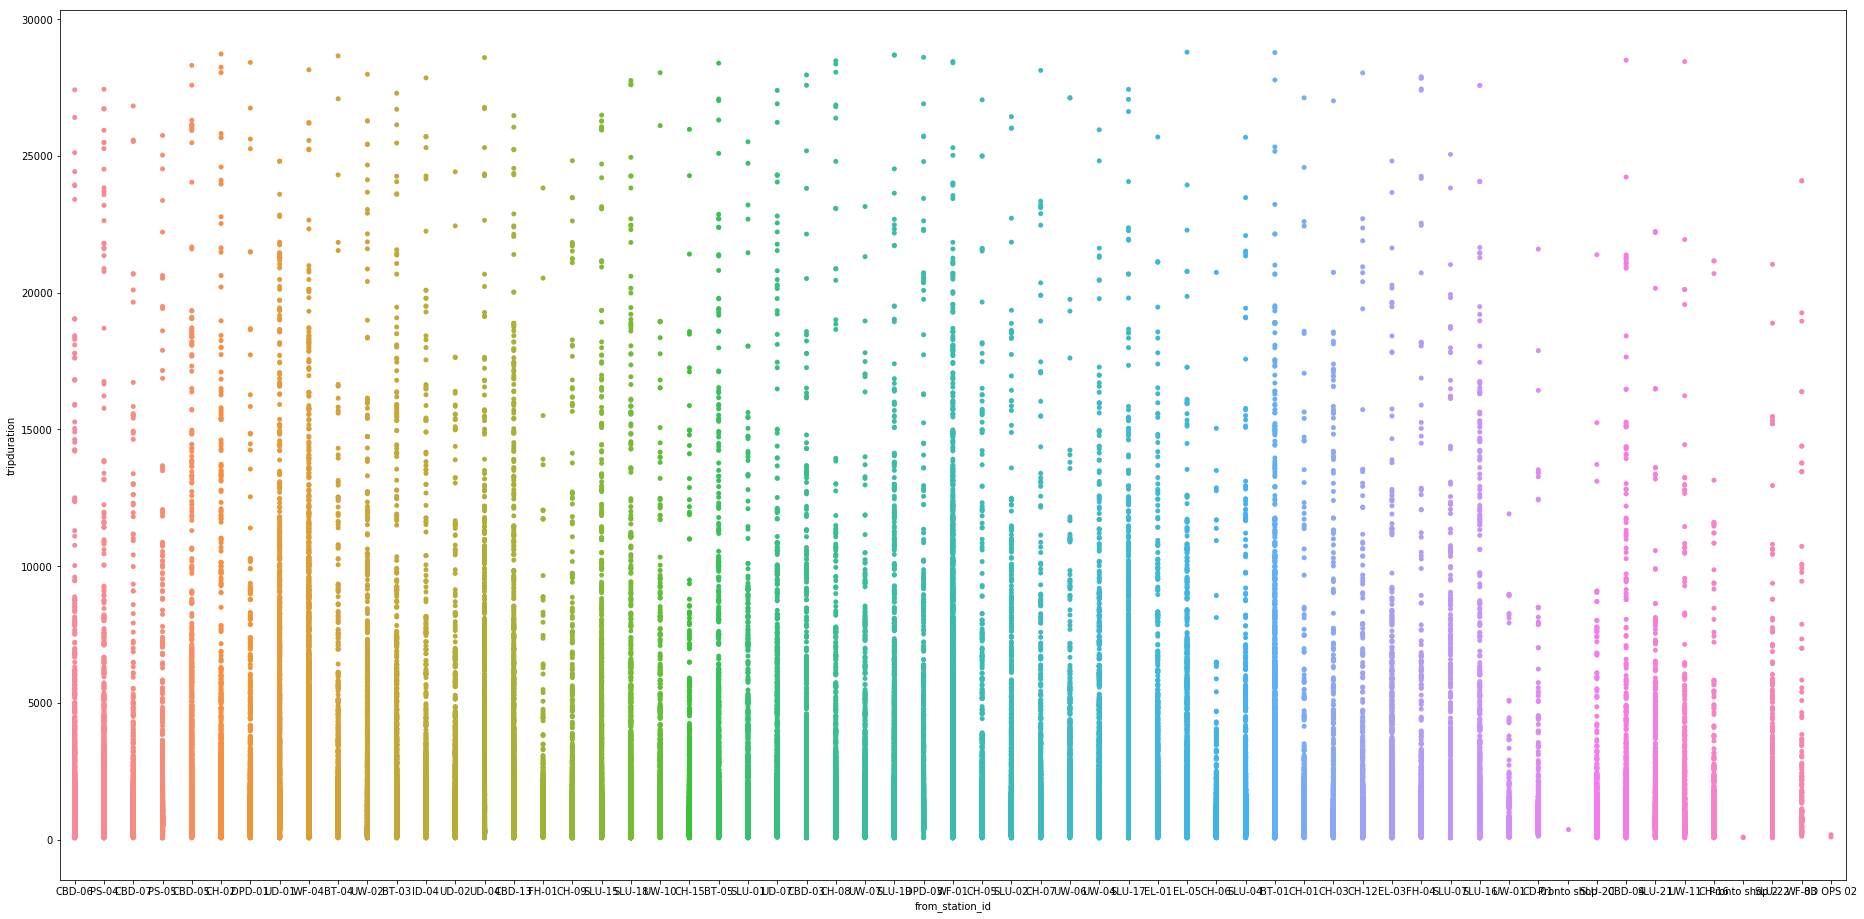

In [15]:
plt.rcParams['figure.figsize'] = (32, 16)
sns.stripplot(x="from_station_id", y="tripduration", data=trip)

In [16]:
trip.from_station_name.value_counts()

Pier 69 / Alaskan Way & Clay St                                           11274
E Pine St & 16th Ave                                                       9466
3rd Ave & Broad St                                                         9392
2nd Ave & Pine St                                                          8198
Westlake Ave & 6th Ave                                                     8188
Cal Anderson Park / 11th Ave & Pine St                                     7690
E Harrison St & Broadway Ave E                                             7685
2nd Ave & Vine St                                                          6568
Key Arena / 1st Ave N & Harrison St                                        6402
REI / Yale Ave N & John St                                                 6401
15th Ave E & E Thomas St                                                   6206
Dexter Ave N & Aloha St                                                    5917
PATH / 9th Ave & Westlake Ave           

In [17]:
trip.from_station_name.value_counts().describe()

count       61.000000
mean      3869.918033
std       2578.830525
min          1.000000
25%       2012.000000
50%       3461.000000
75%       5385.000000
max      11274.000000
Name: from_station_name, dtype: float64

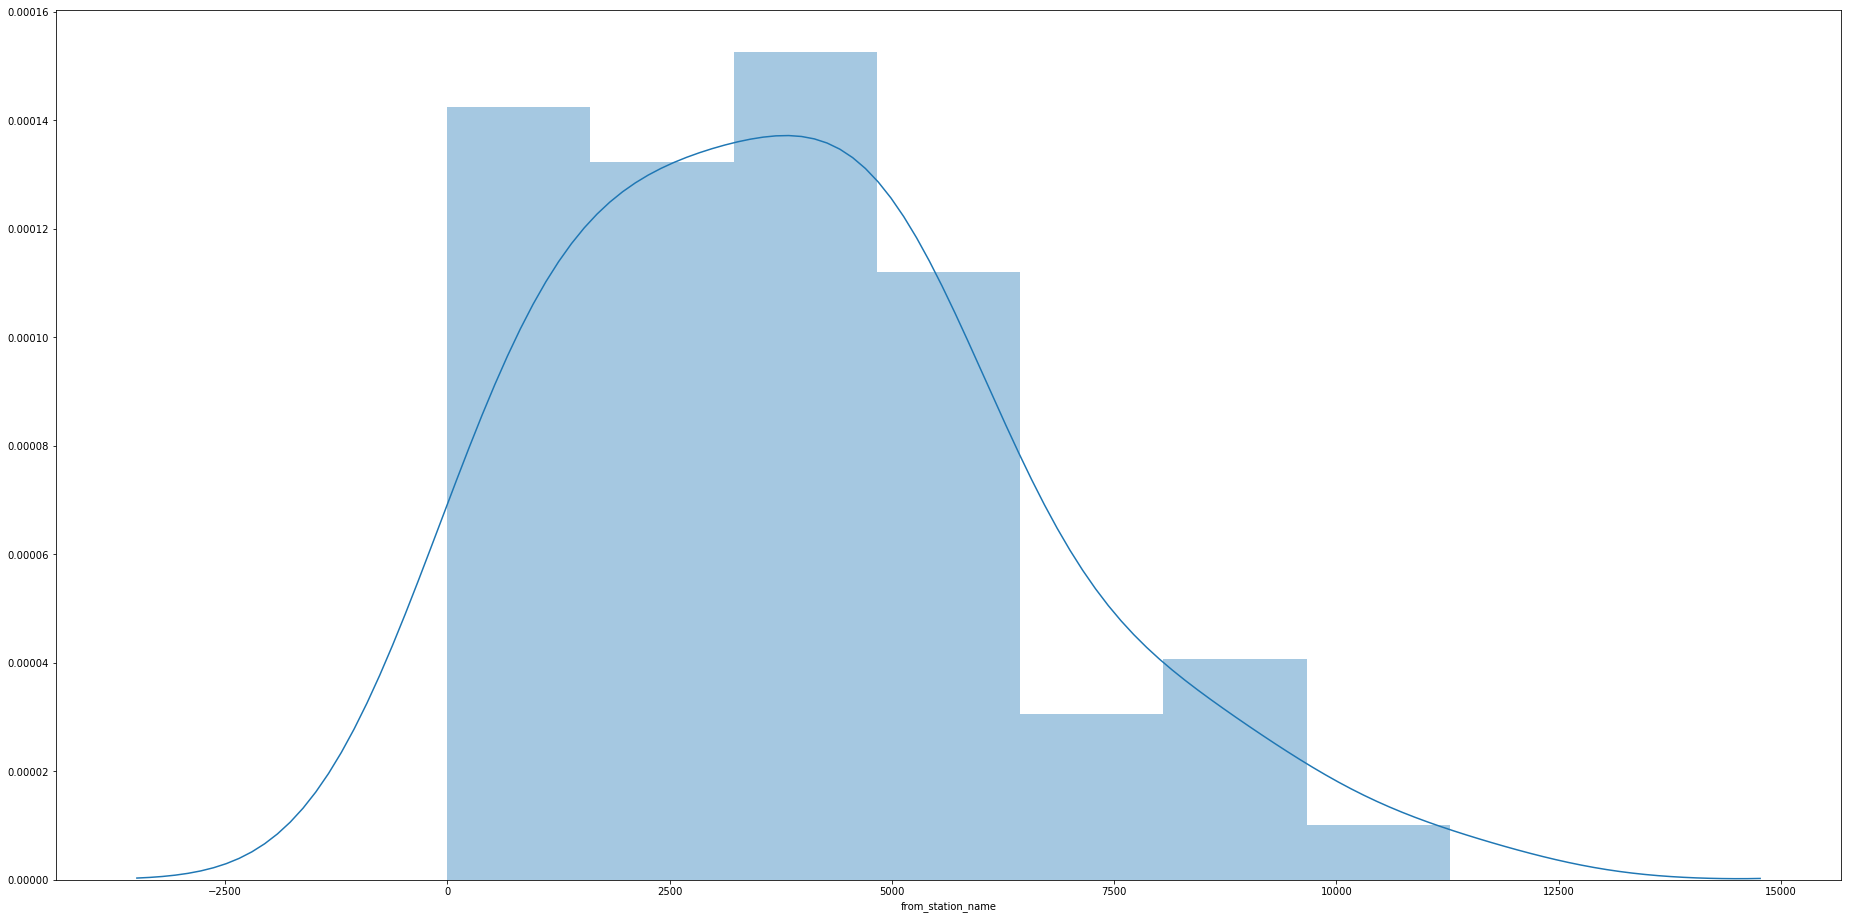

In [18]:
sns.distplot(trip.from_station_name.value_counts())

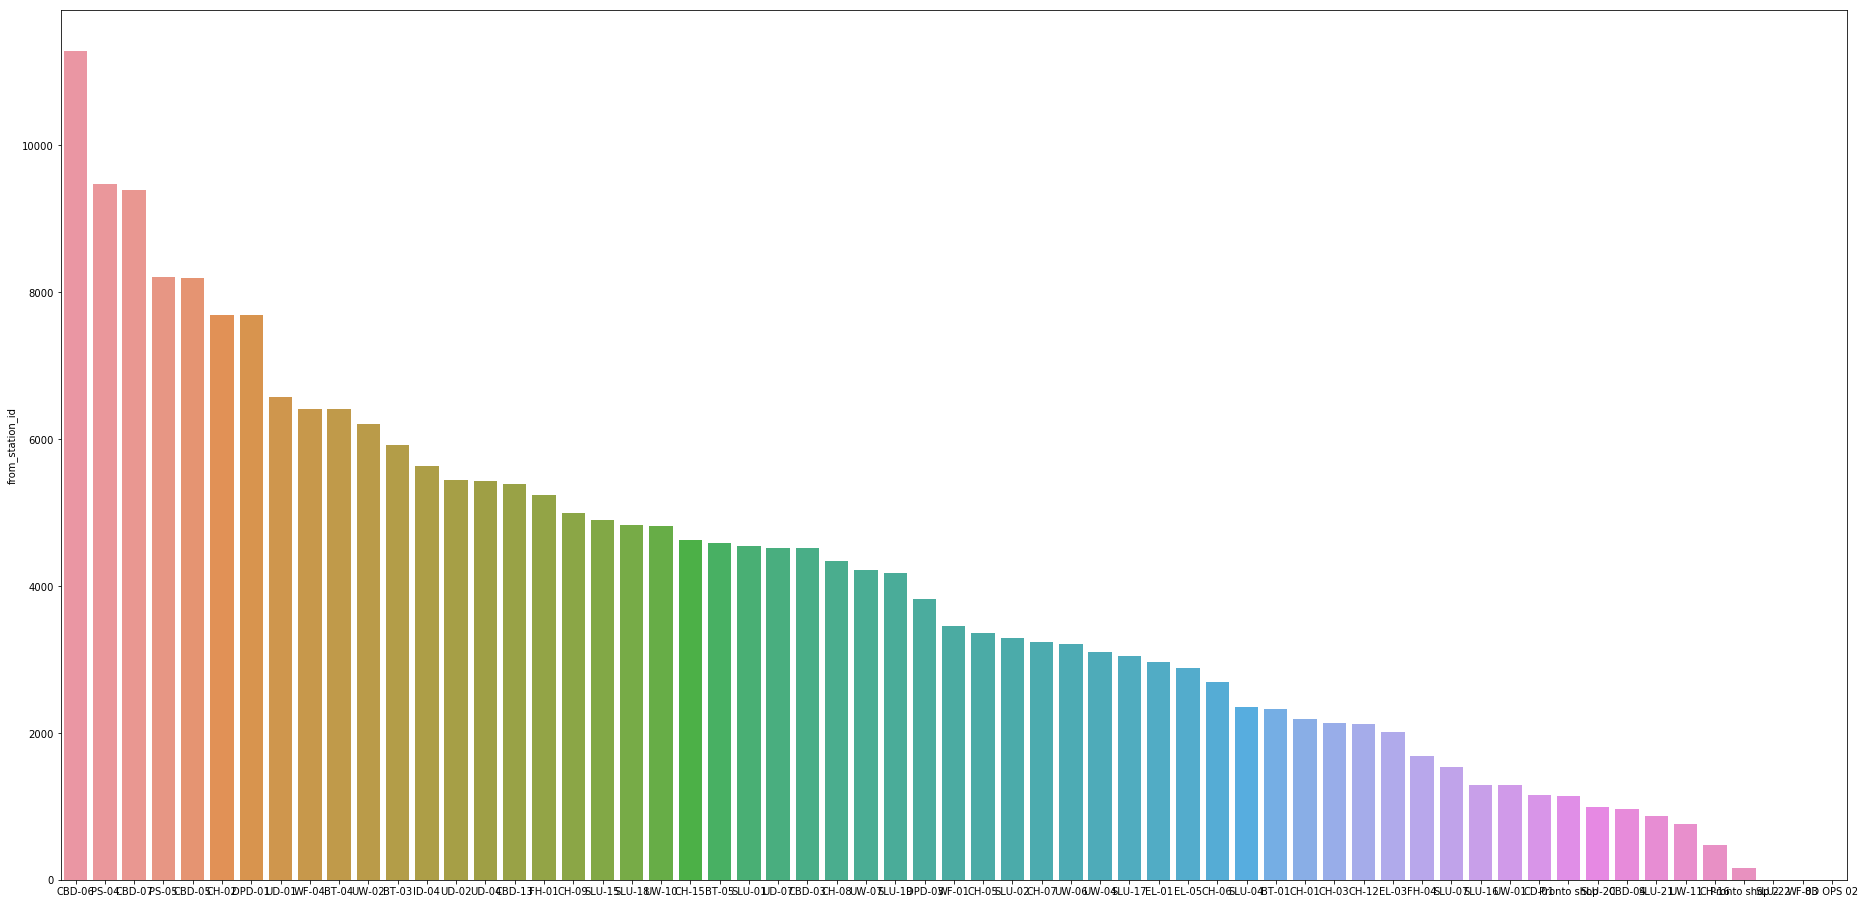

In [19]:
sns.barplot(x=trip.from_station_id.unique(),y=trip.from_station_id.value_counts())

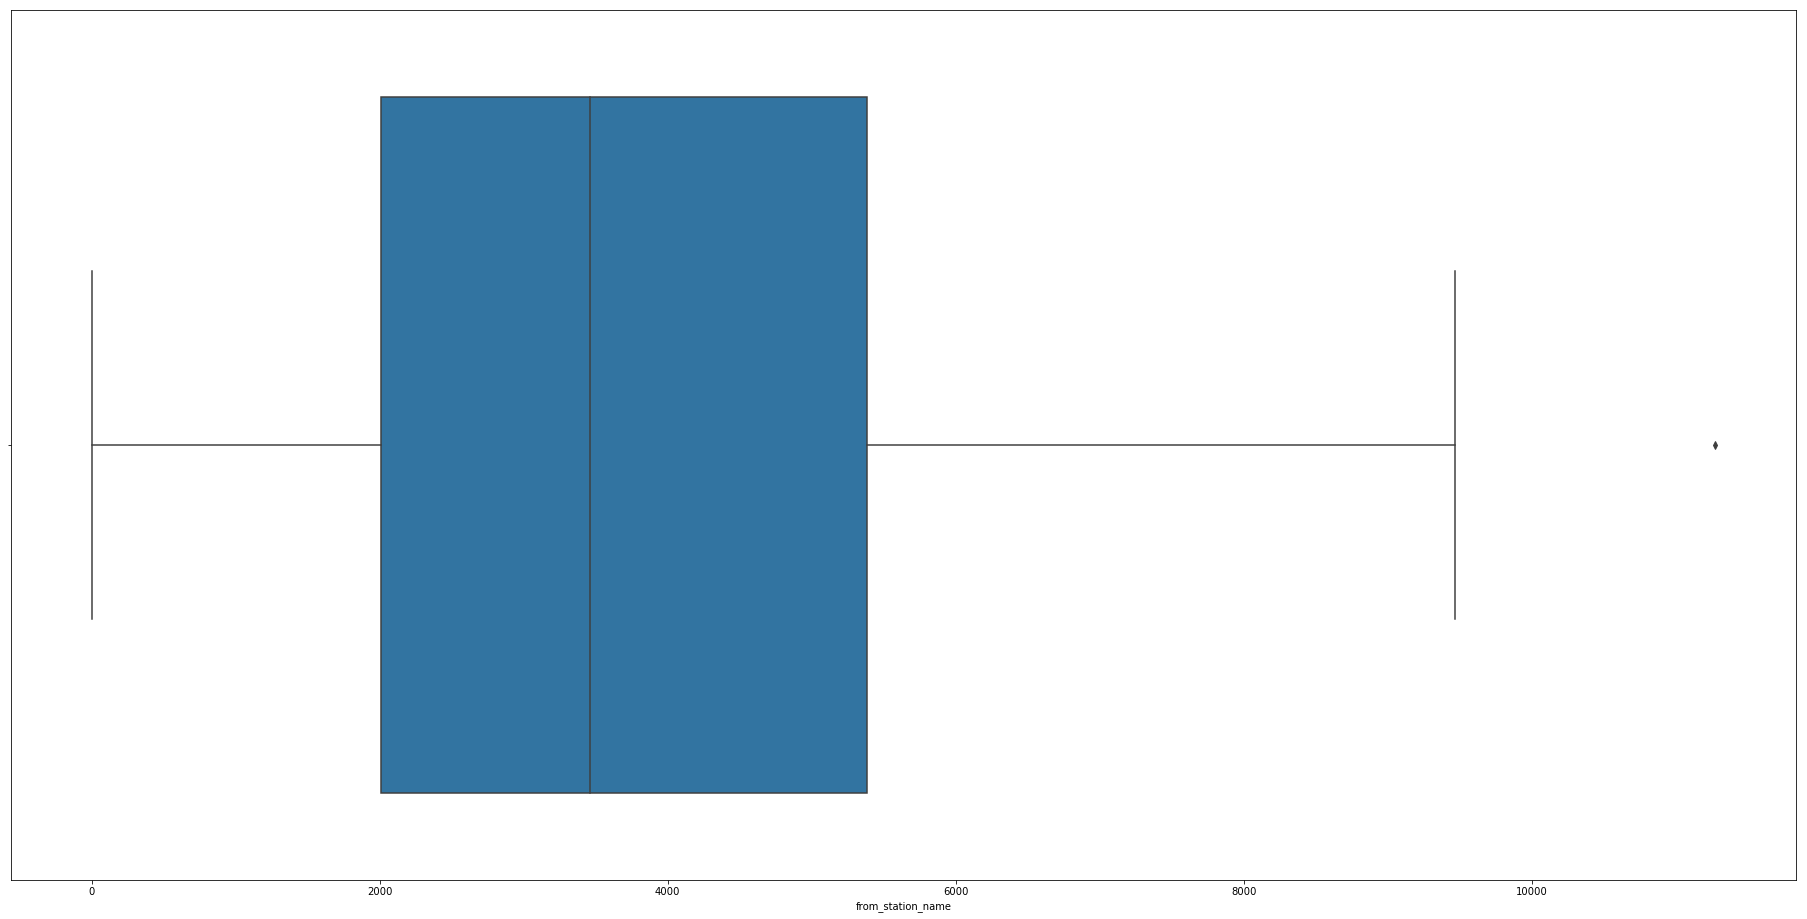

In [20]:
sns.boxplot(x=(trip.from_station_name.value_counts()))

In [21]:
trip.to_station_name.value_counts().describe()

count       61.000000
mean      3869.918033
std       2909.667044
min          2.000000
25%       1497.000000
50%       3201.000000
75%       5772.000000
max      11768.000000
Name: to_station_name, dtype: float64

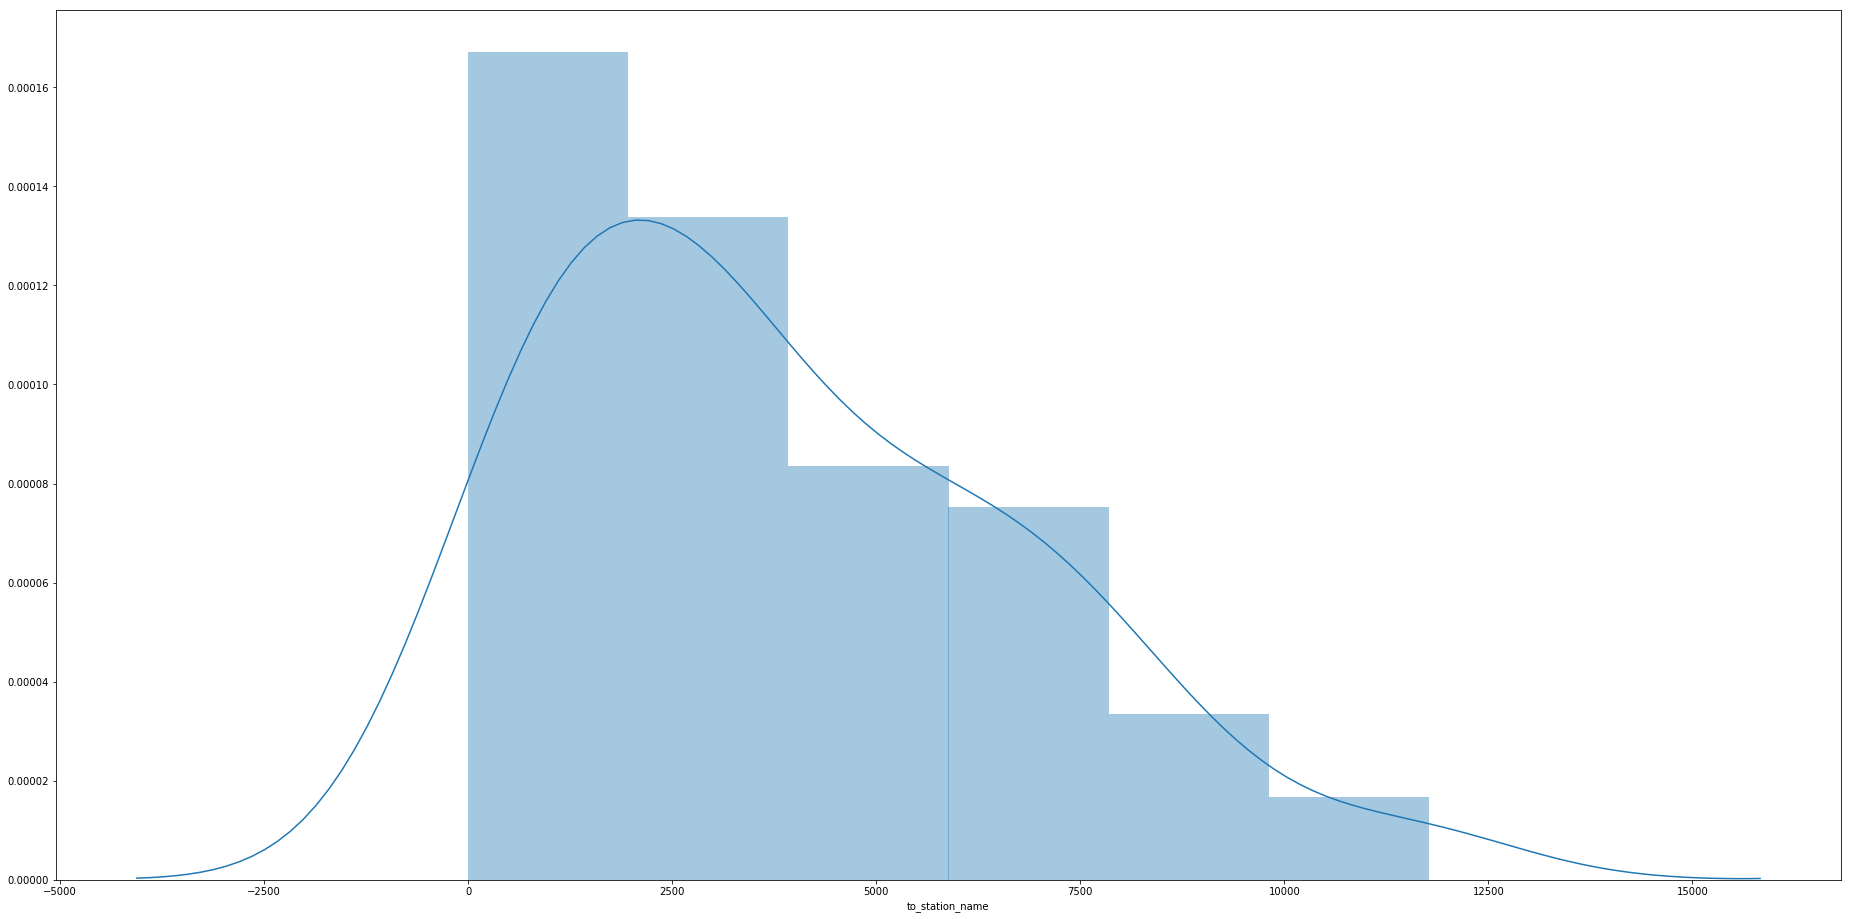

In [22]:
sns.distplot(trip.to_station_name.value_counts())

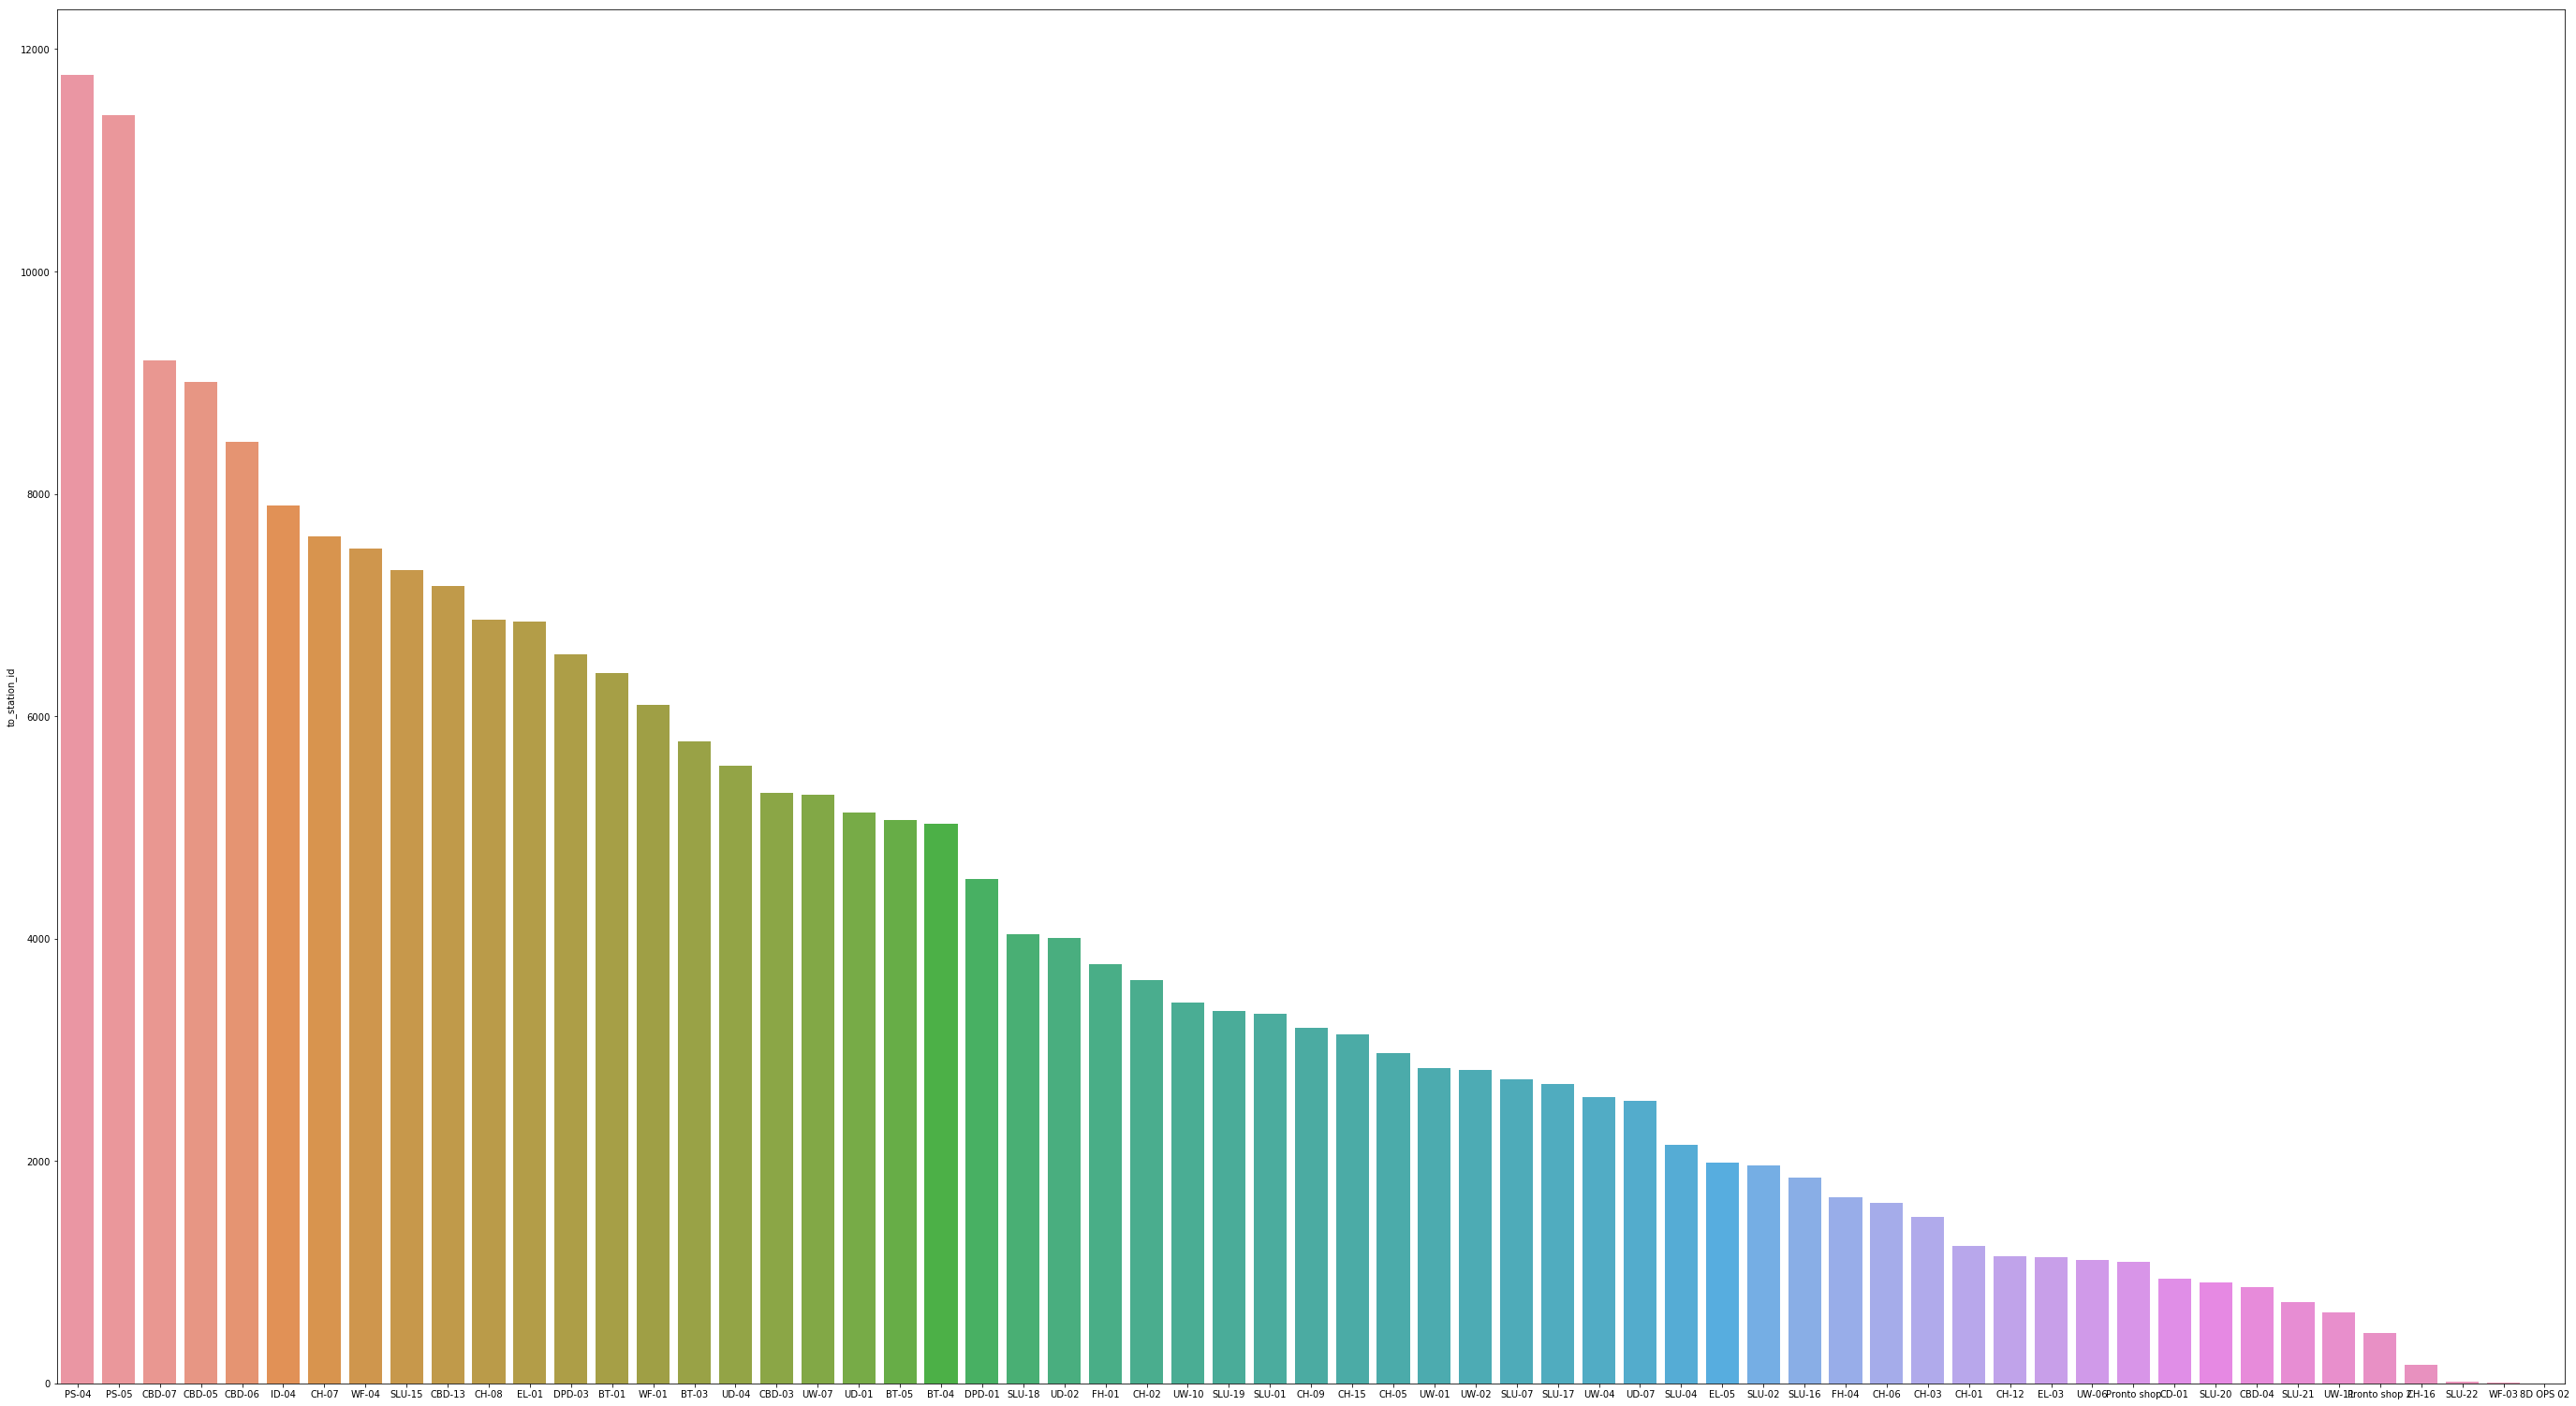

In [23]:
plt.rcParams['figure.figsize'] = (48, 27)
sns.barplot(x=trip.to_station_id.unique(),y=trip.to_station_id.value_counts())

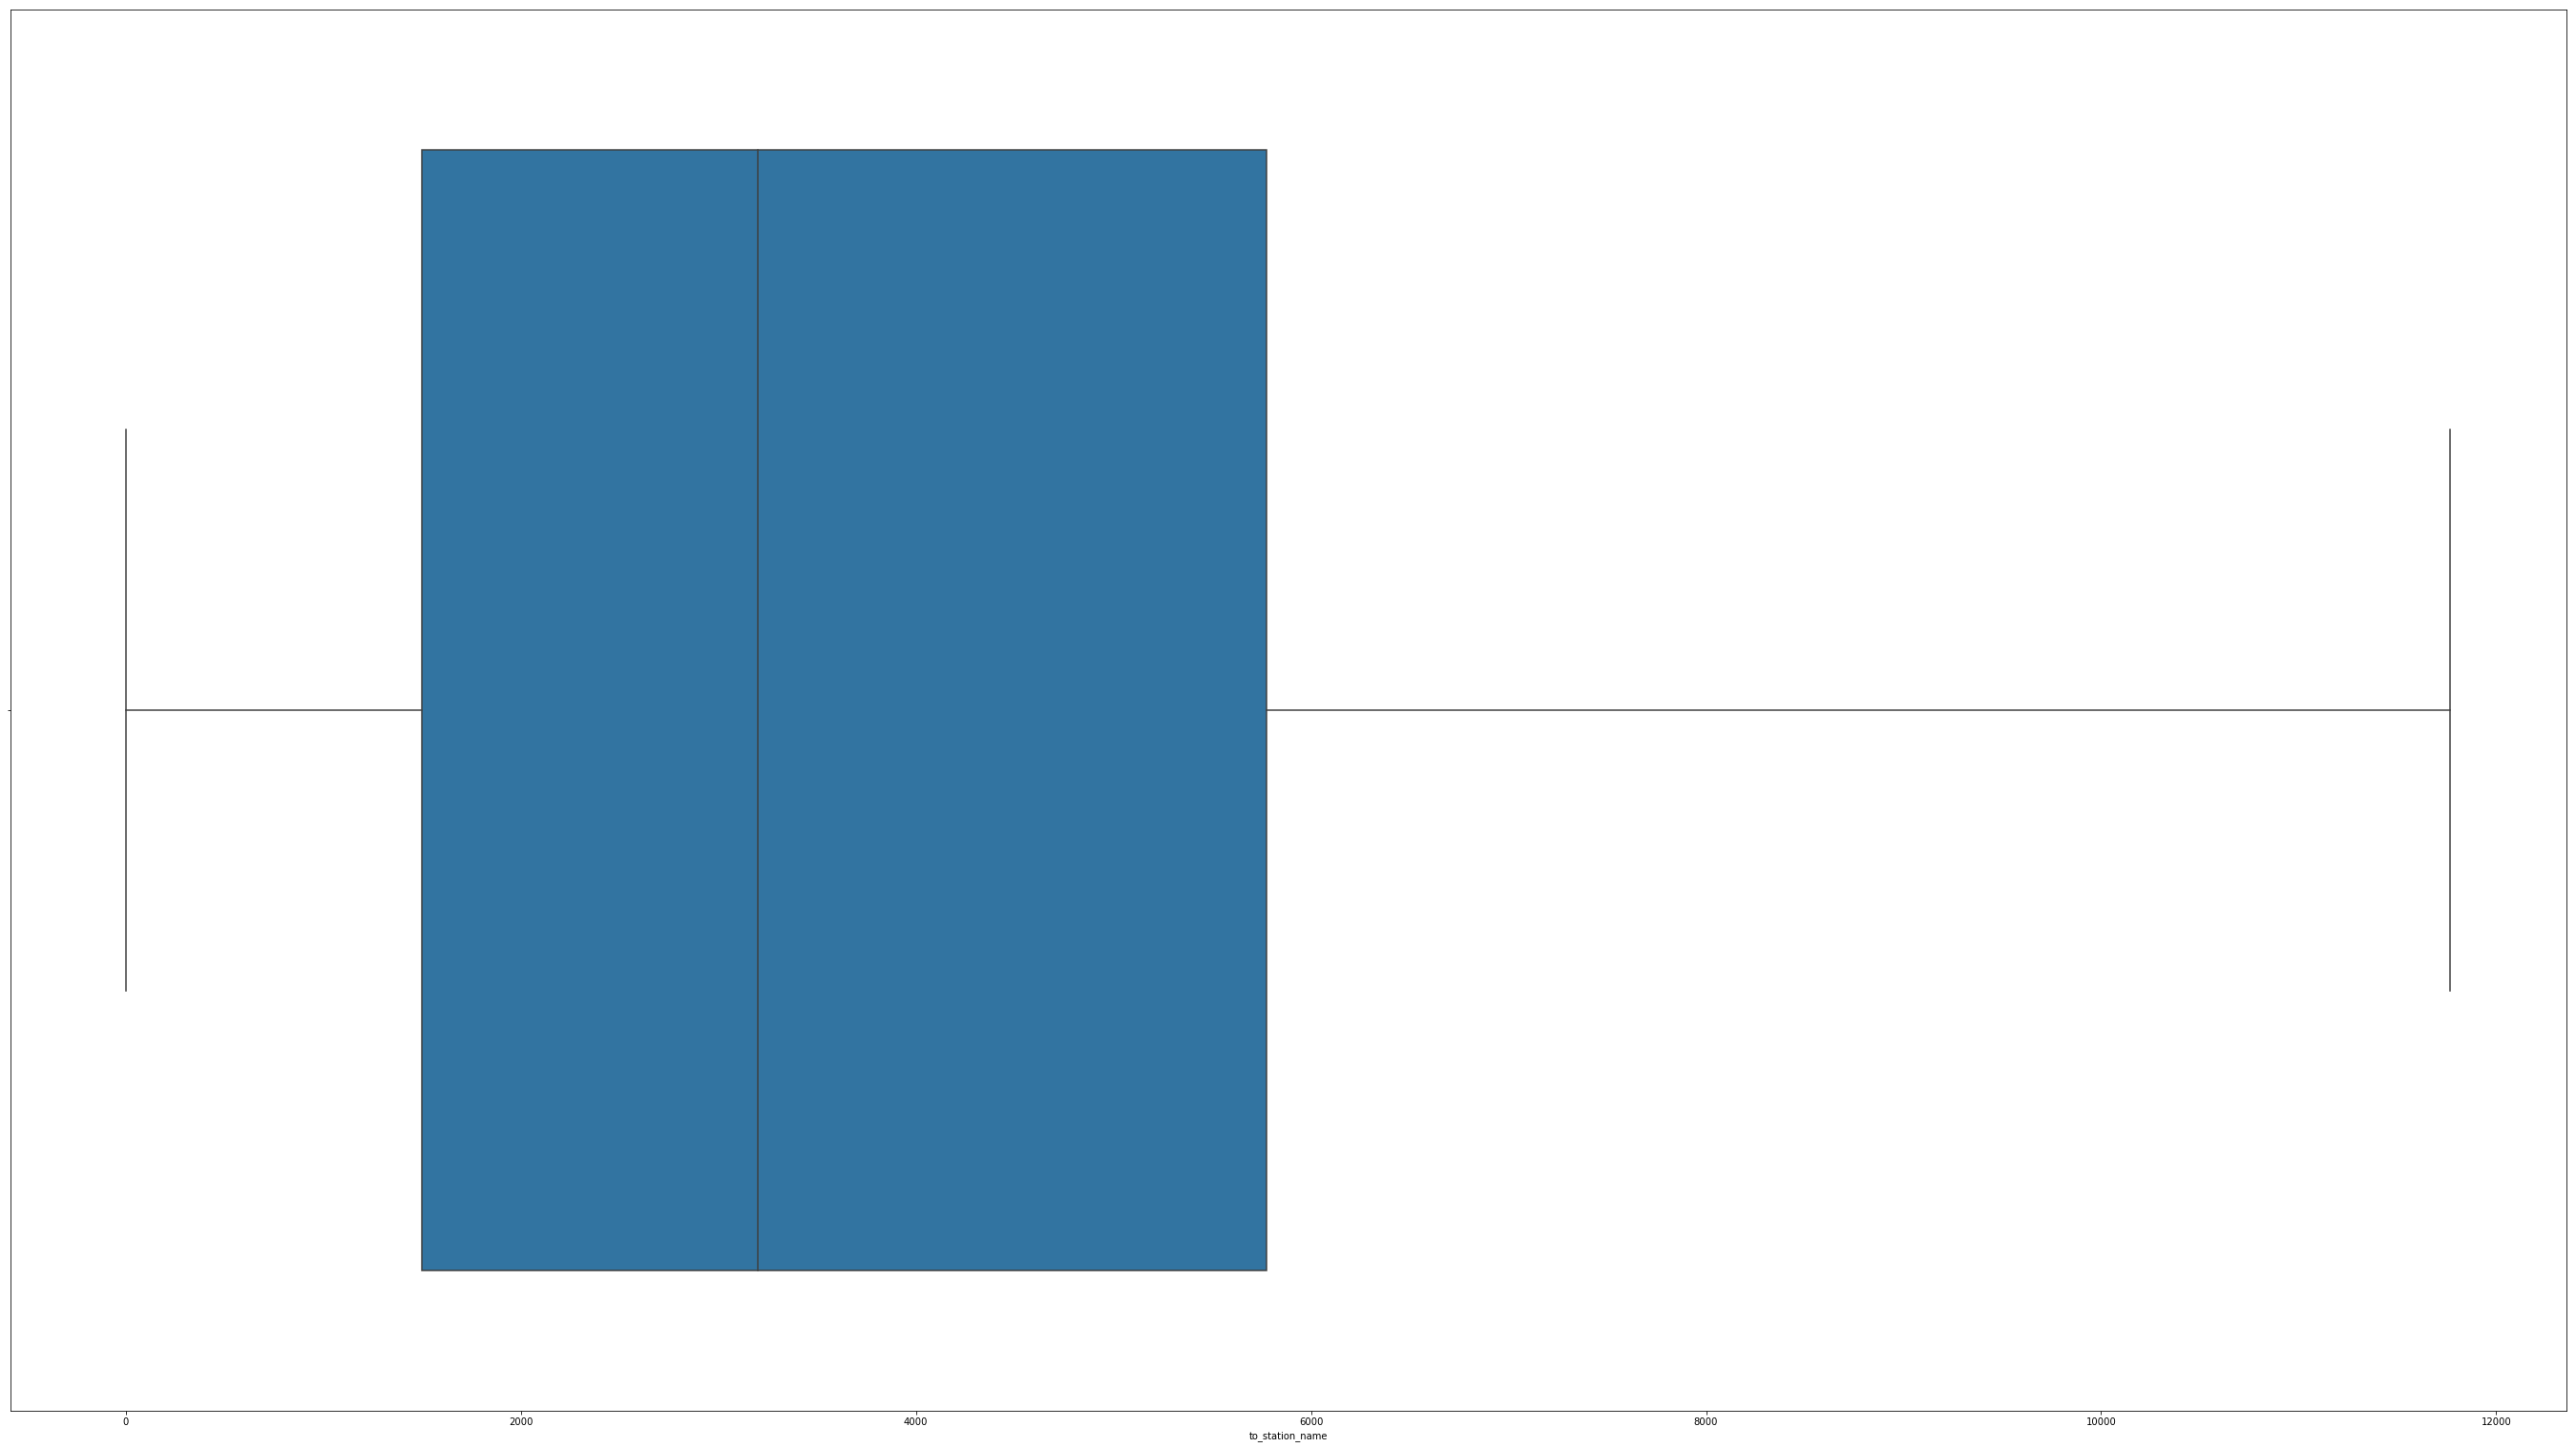

In [24]:
sns.boxplot(x=(trip.to_station_name.value_counts()))

In [25]:
trip.usertype.value_counts()

Member                    146171
Short-Term Pass Holder     89894
Name: usertype, dtype: int64

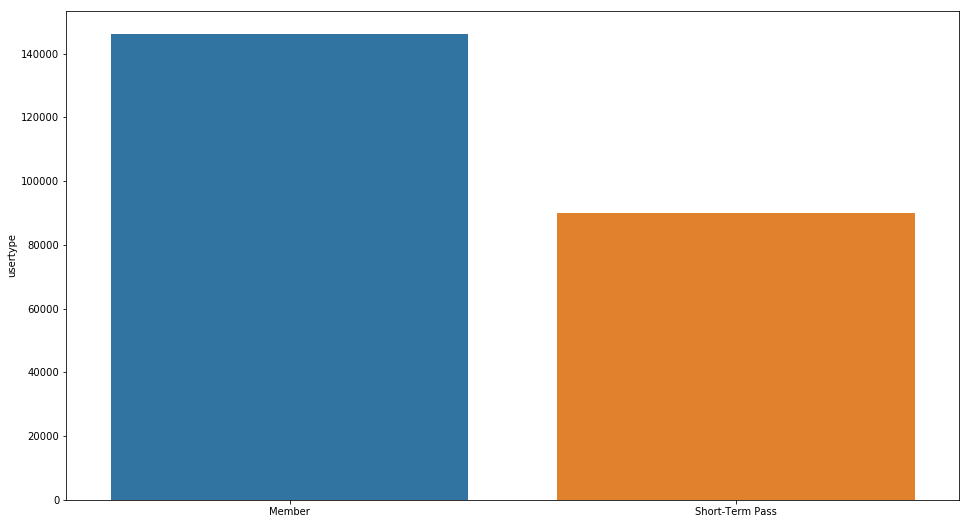

In [26]:
plt.rcParams['figure.figsize'] = (16, 9)
sns.barplot(y=trip.usertype.value_counts(),x=["Member", "Short-Term Pass"],data=trip)

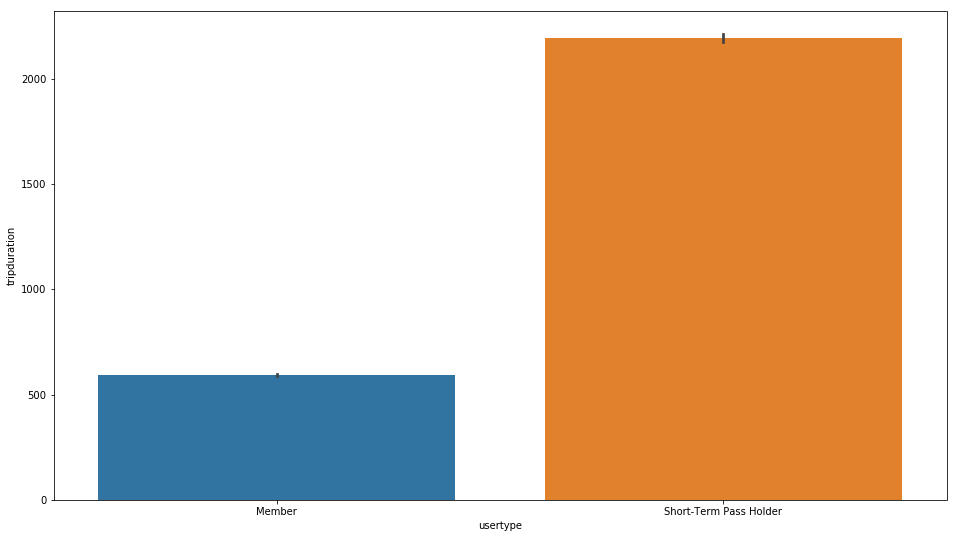

In [27]:
sns.barplot(x=trip.usertype,y=trip.tripduration,data=trip)

In [28]:
trip.gender.value_counts()
#trip.gender.unique()

Male      112940
Female     30330
Other       2901
Name: gender, dtype: int64

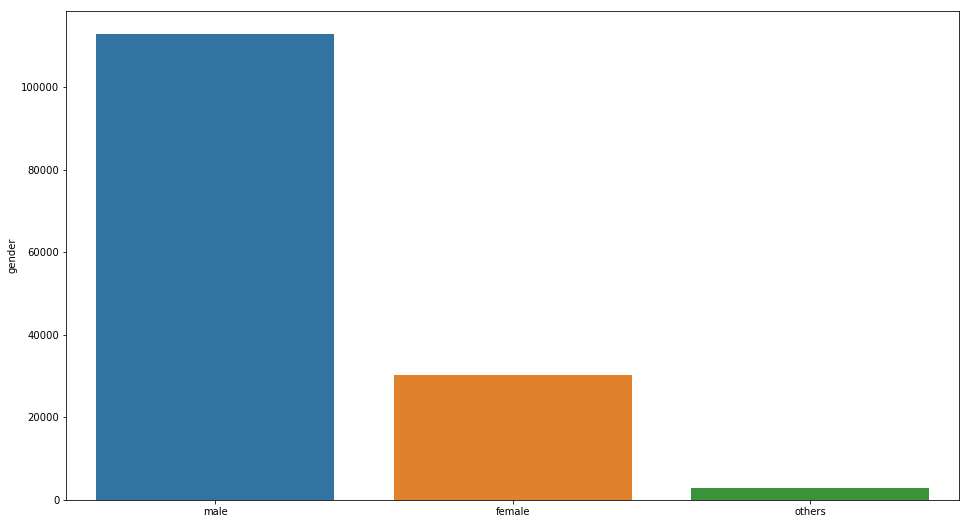

In [29]:
sns.barplot(x=['male', 'female', 'others'], y=trip.gender.value_counts(), data=trip)

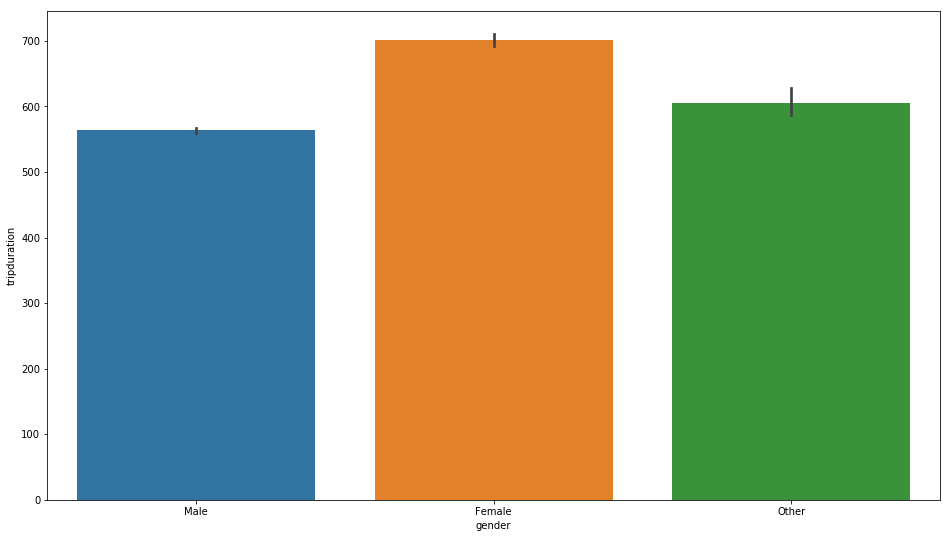

In [30]:
sns.barplot(x=trip.gender, y=trip.tripduration, data=trip)

In [31]:
trip.birthyear.describe()

count    146167.000000
mean       1979.879740
std          10.154978
min        1931.000000
25%        1975.000000
50%        1983.000000
75%        1987.000000
max        1999.000000
Name: birthyear, dtype: float64

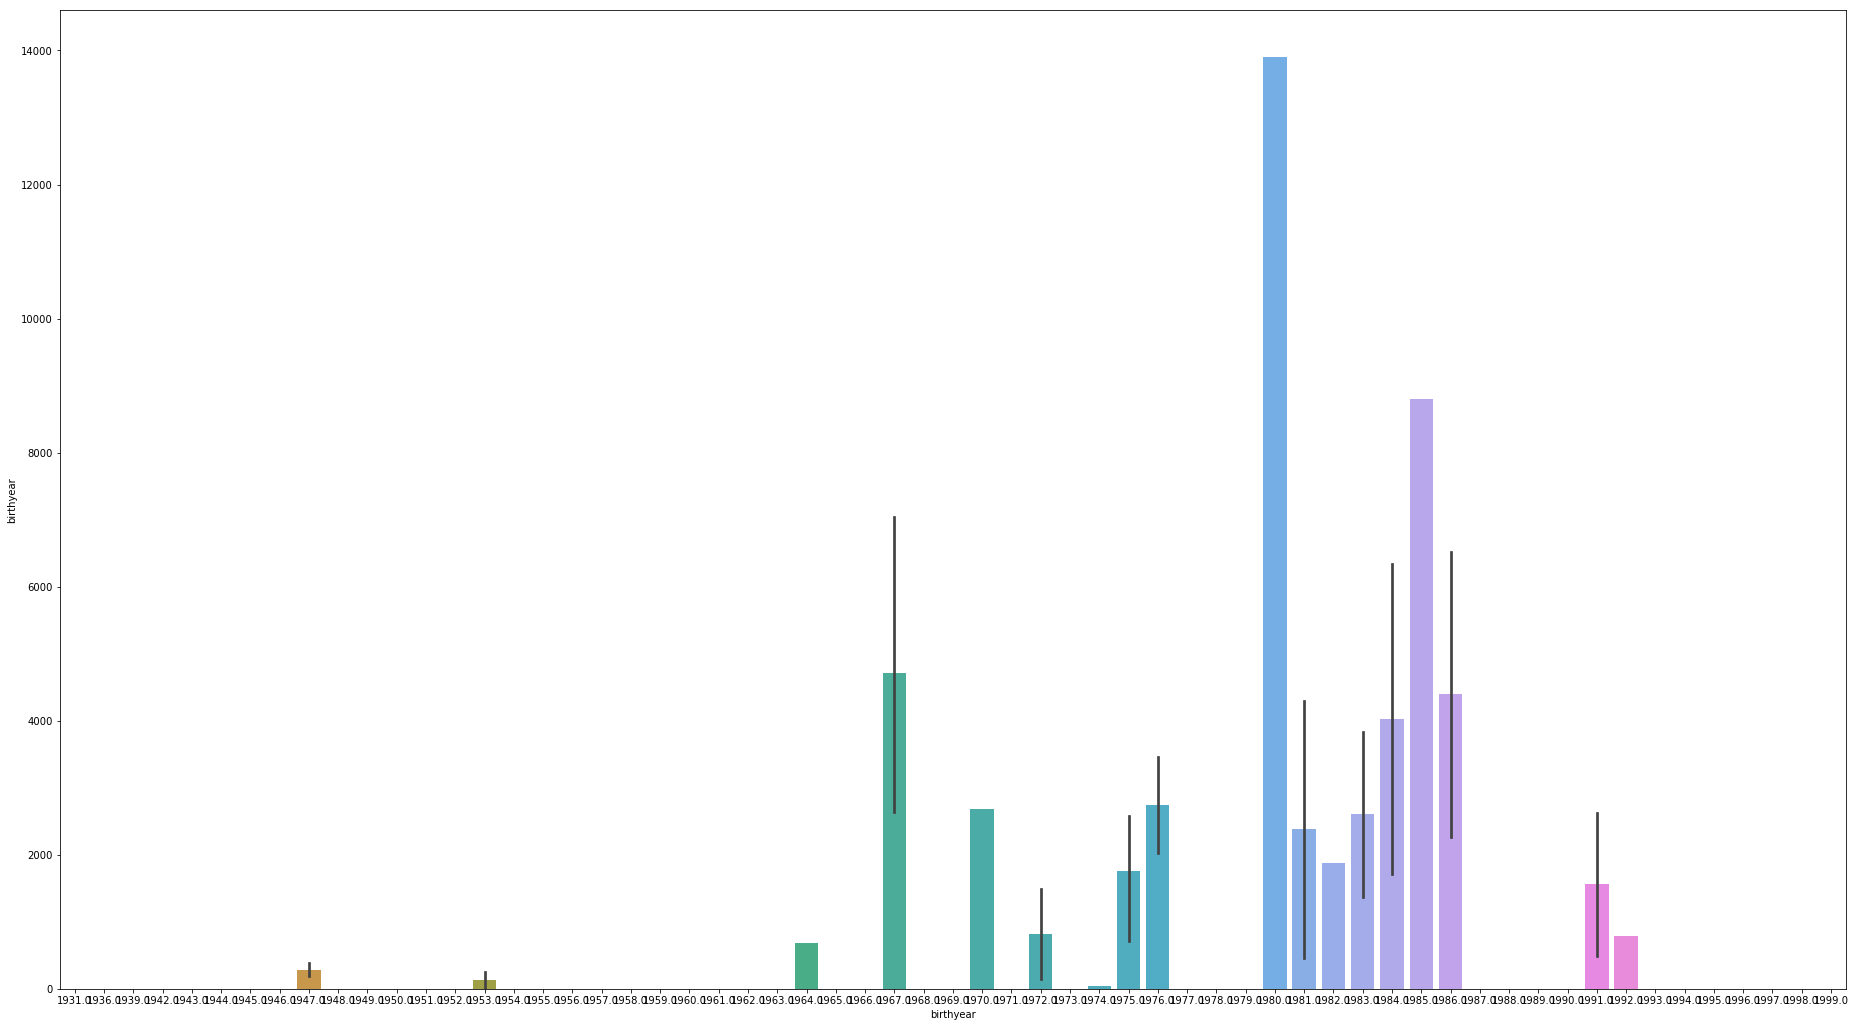

In [32]:
plt.rcParams['figure.figsize'] = (32, 18)
sns.barplot(x=trip.birthyear, y=trip.birthyear.value_counts())

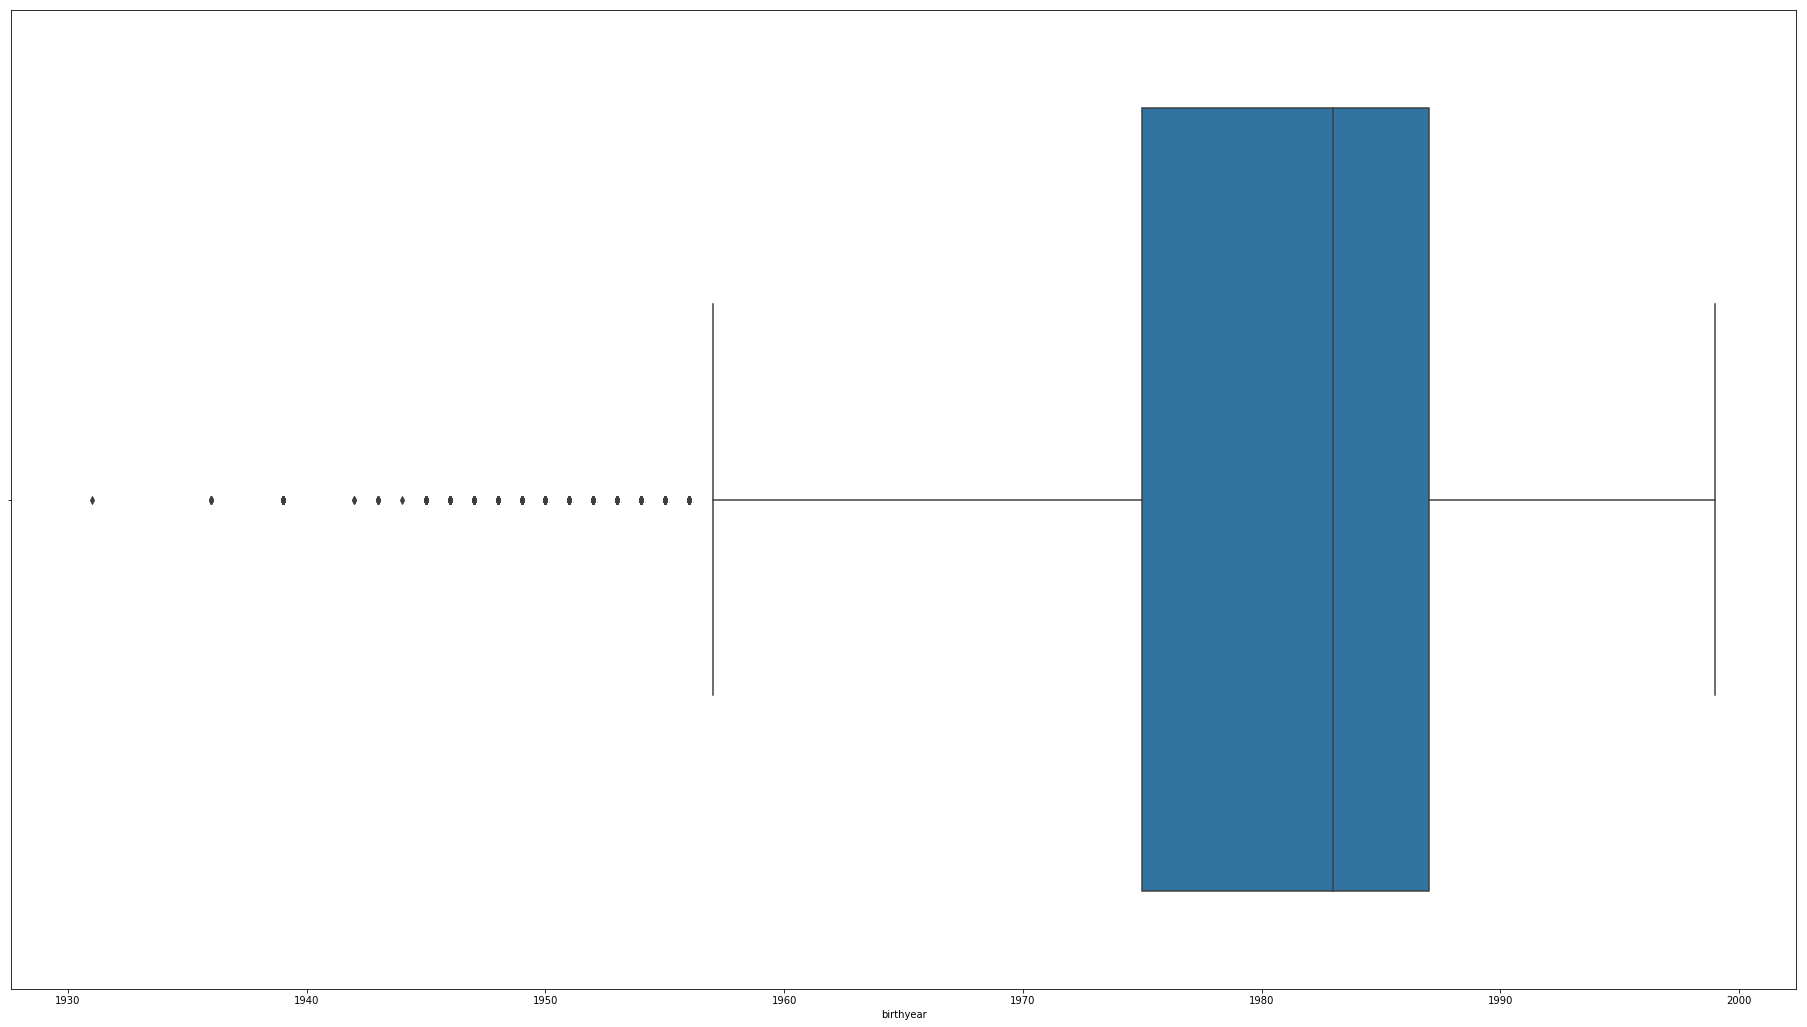

In [33]:
sns.boxplot(x=(trip.birthyear))

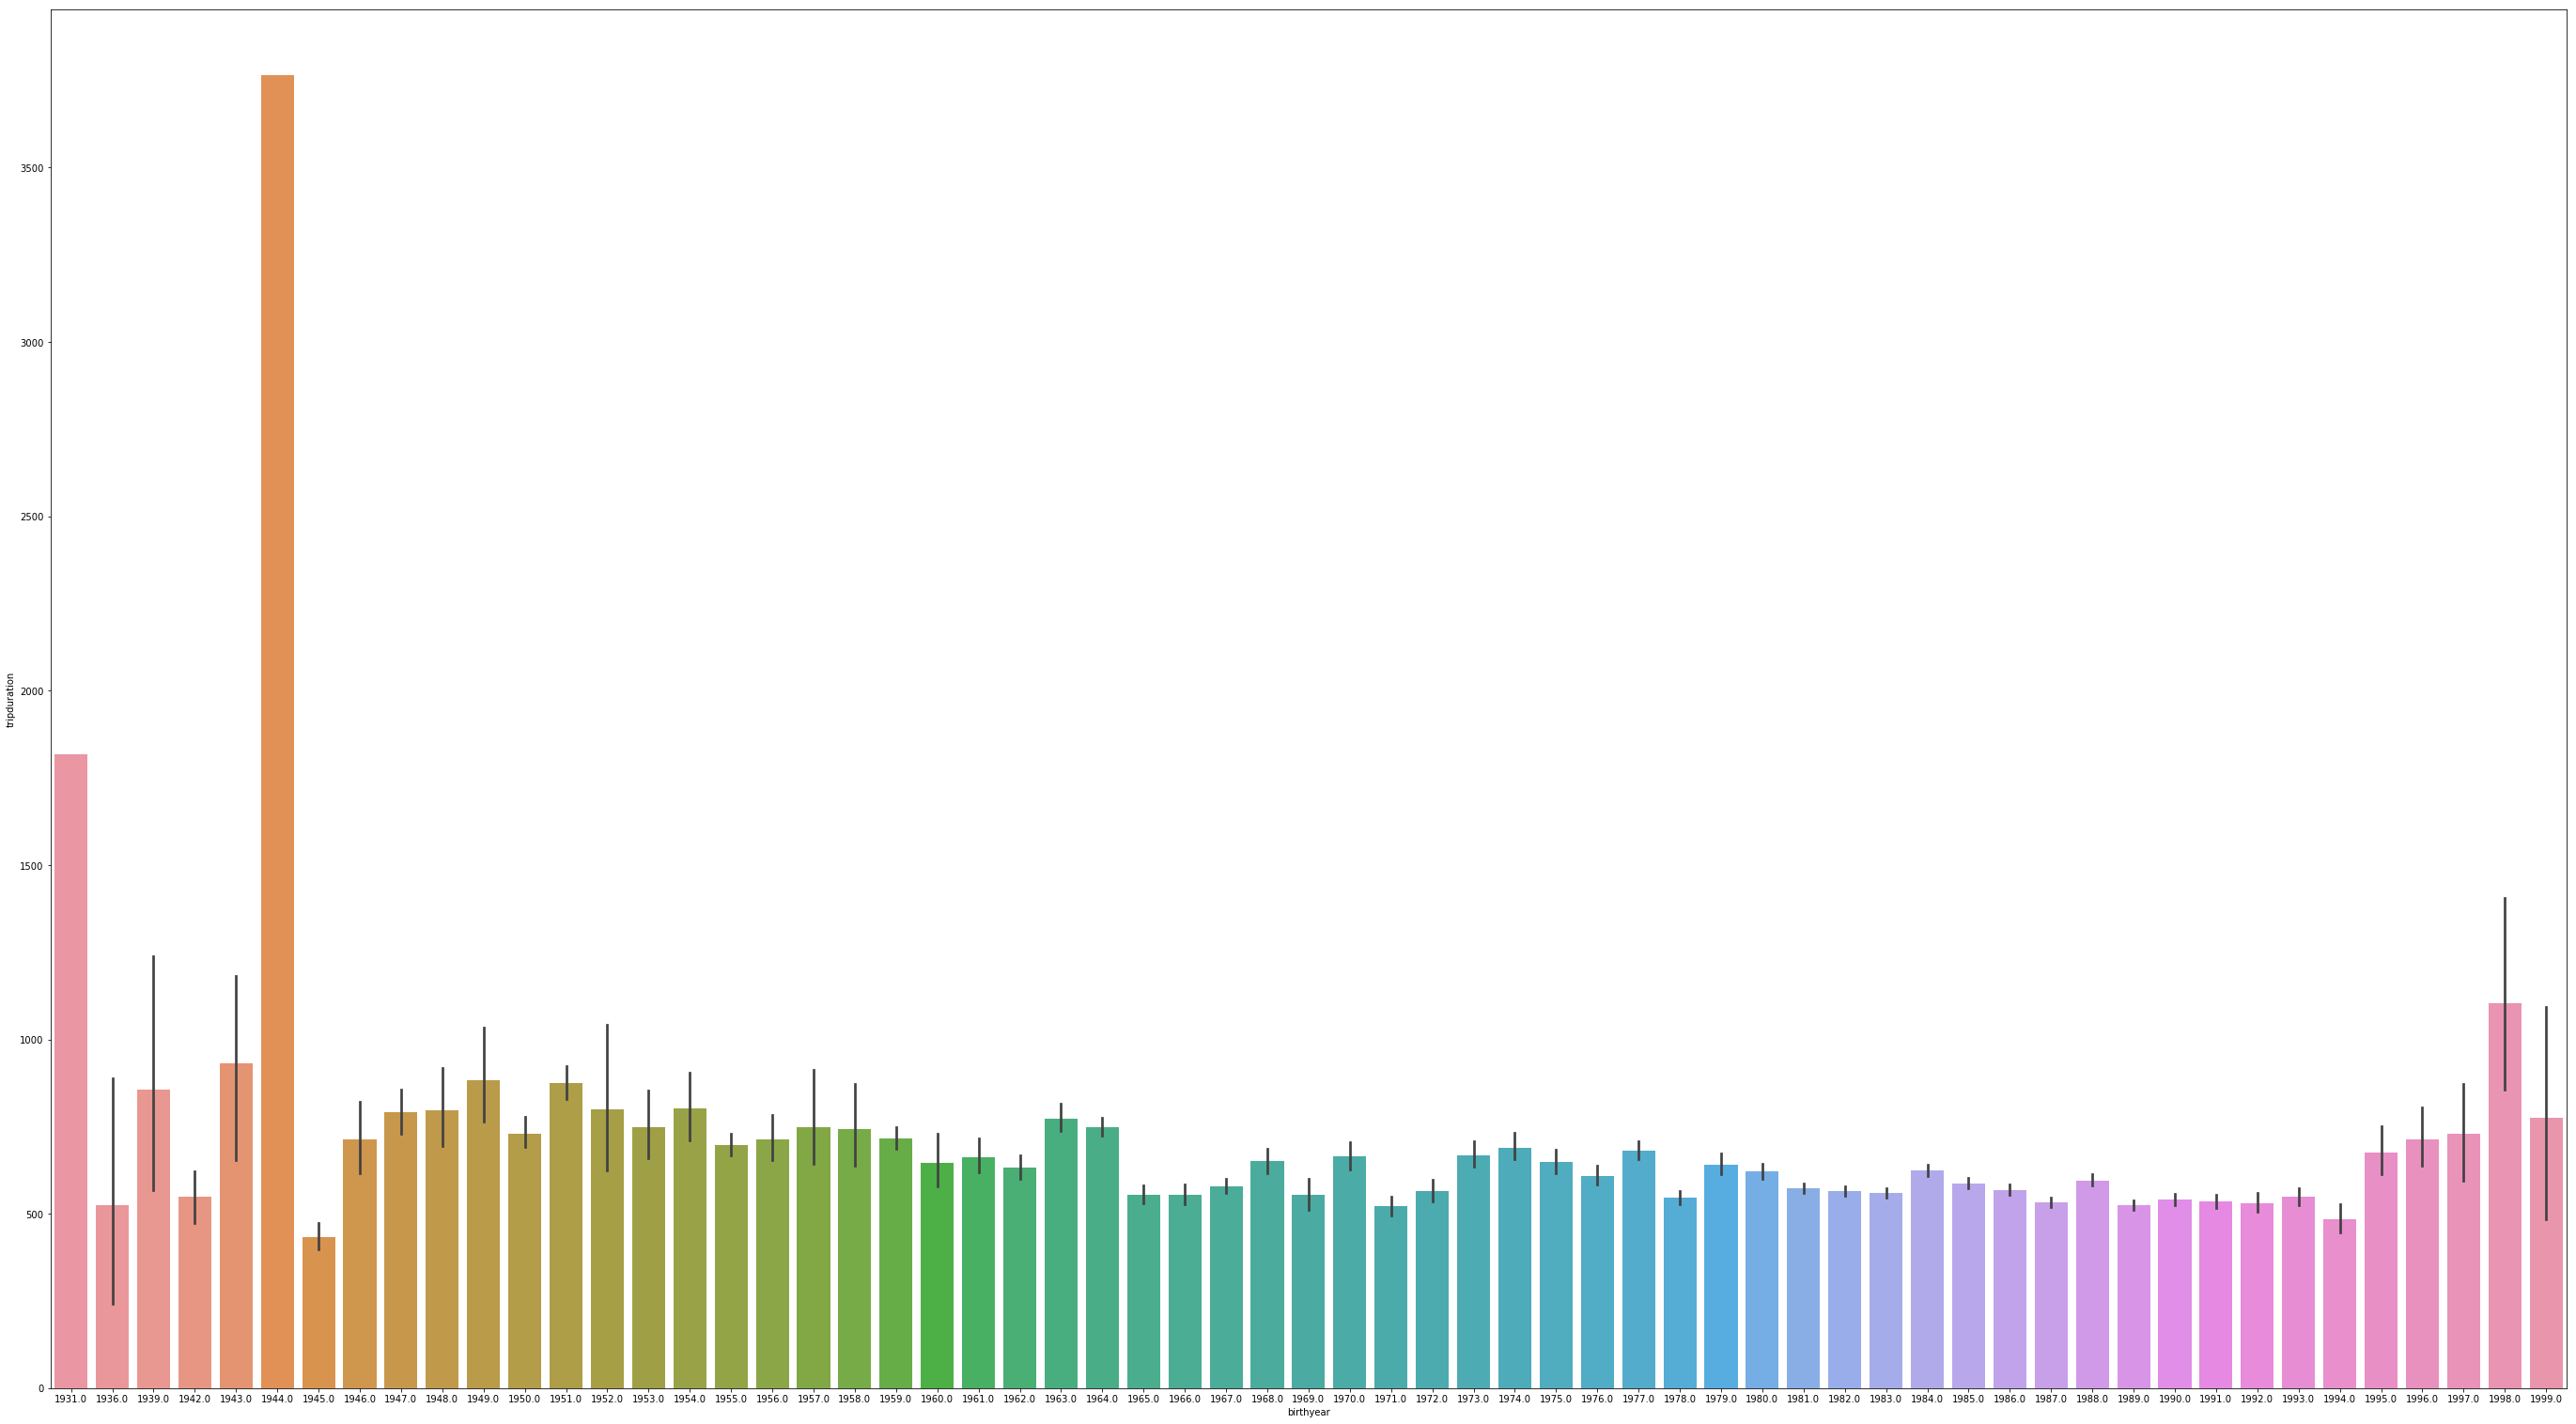

In [34]:
plt.rcParams['figure.figsize'] = (48, 27)
sns.barplot(x=trip.birthyear, y=trip.tripduration,data=trip)

In [35]:
#trip_bak=trip.copy()
#(trip_bak['tripduration'] >15000).sum()

In [36]:
#trip_bak = trip_bak[trip_bak.tripduration <15000]
#(trip_bak['tripduration'] >15000).sum()